# 6.2.3 Exploring Relationships

## Contents List: 

1. Import Visualization Libraries and Data
2. Additional Scatterplots
3. Answering Key Questions
4. Additional Data Visualization

## 1. Import Visualization Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
# charts are displayed in the notebook without the need to "call" them specifically
%matplotlib inline

In [3]:
# define path
path = r'/Users/carolinelasersohn/Documents/Documents - Caroline’s MacBook Pro/data analytics/Immersion/Section 6/Final Project 6'

In [4]:
# import original data set "dairy_wrangled.csv"
df = pd.read_csv(os.path.join(path, '02 Data','Prepared Data', 'dairy_wrangled.csv'))

## 2. Additional Scatterplots

In [5]:
print(df.dtypes)

Unnamed: 0                               int64
Location                                object
Total Land Area (acres)                float64
Number of Cows                           int64
Farm Size                               object
Date                                    object
Product Name                            object
Brand                                   object
Quantity (liters/kg)                   float64
Price per Unit                         float64
Total Value                            float64
Shelf Life (days)                        int64
Storage Condition                       object
Production Date                         object
Expiration Date                         object
Quantity Sold (liters/kg)                int64
Price per Unit (sold)                  float64
Approx. Total Revenue(INR)             float64
Customer Location                       object
Sales Channel                           object
Quantity in Stock (liters/kg)            int64
Minimum Stock

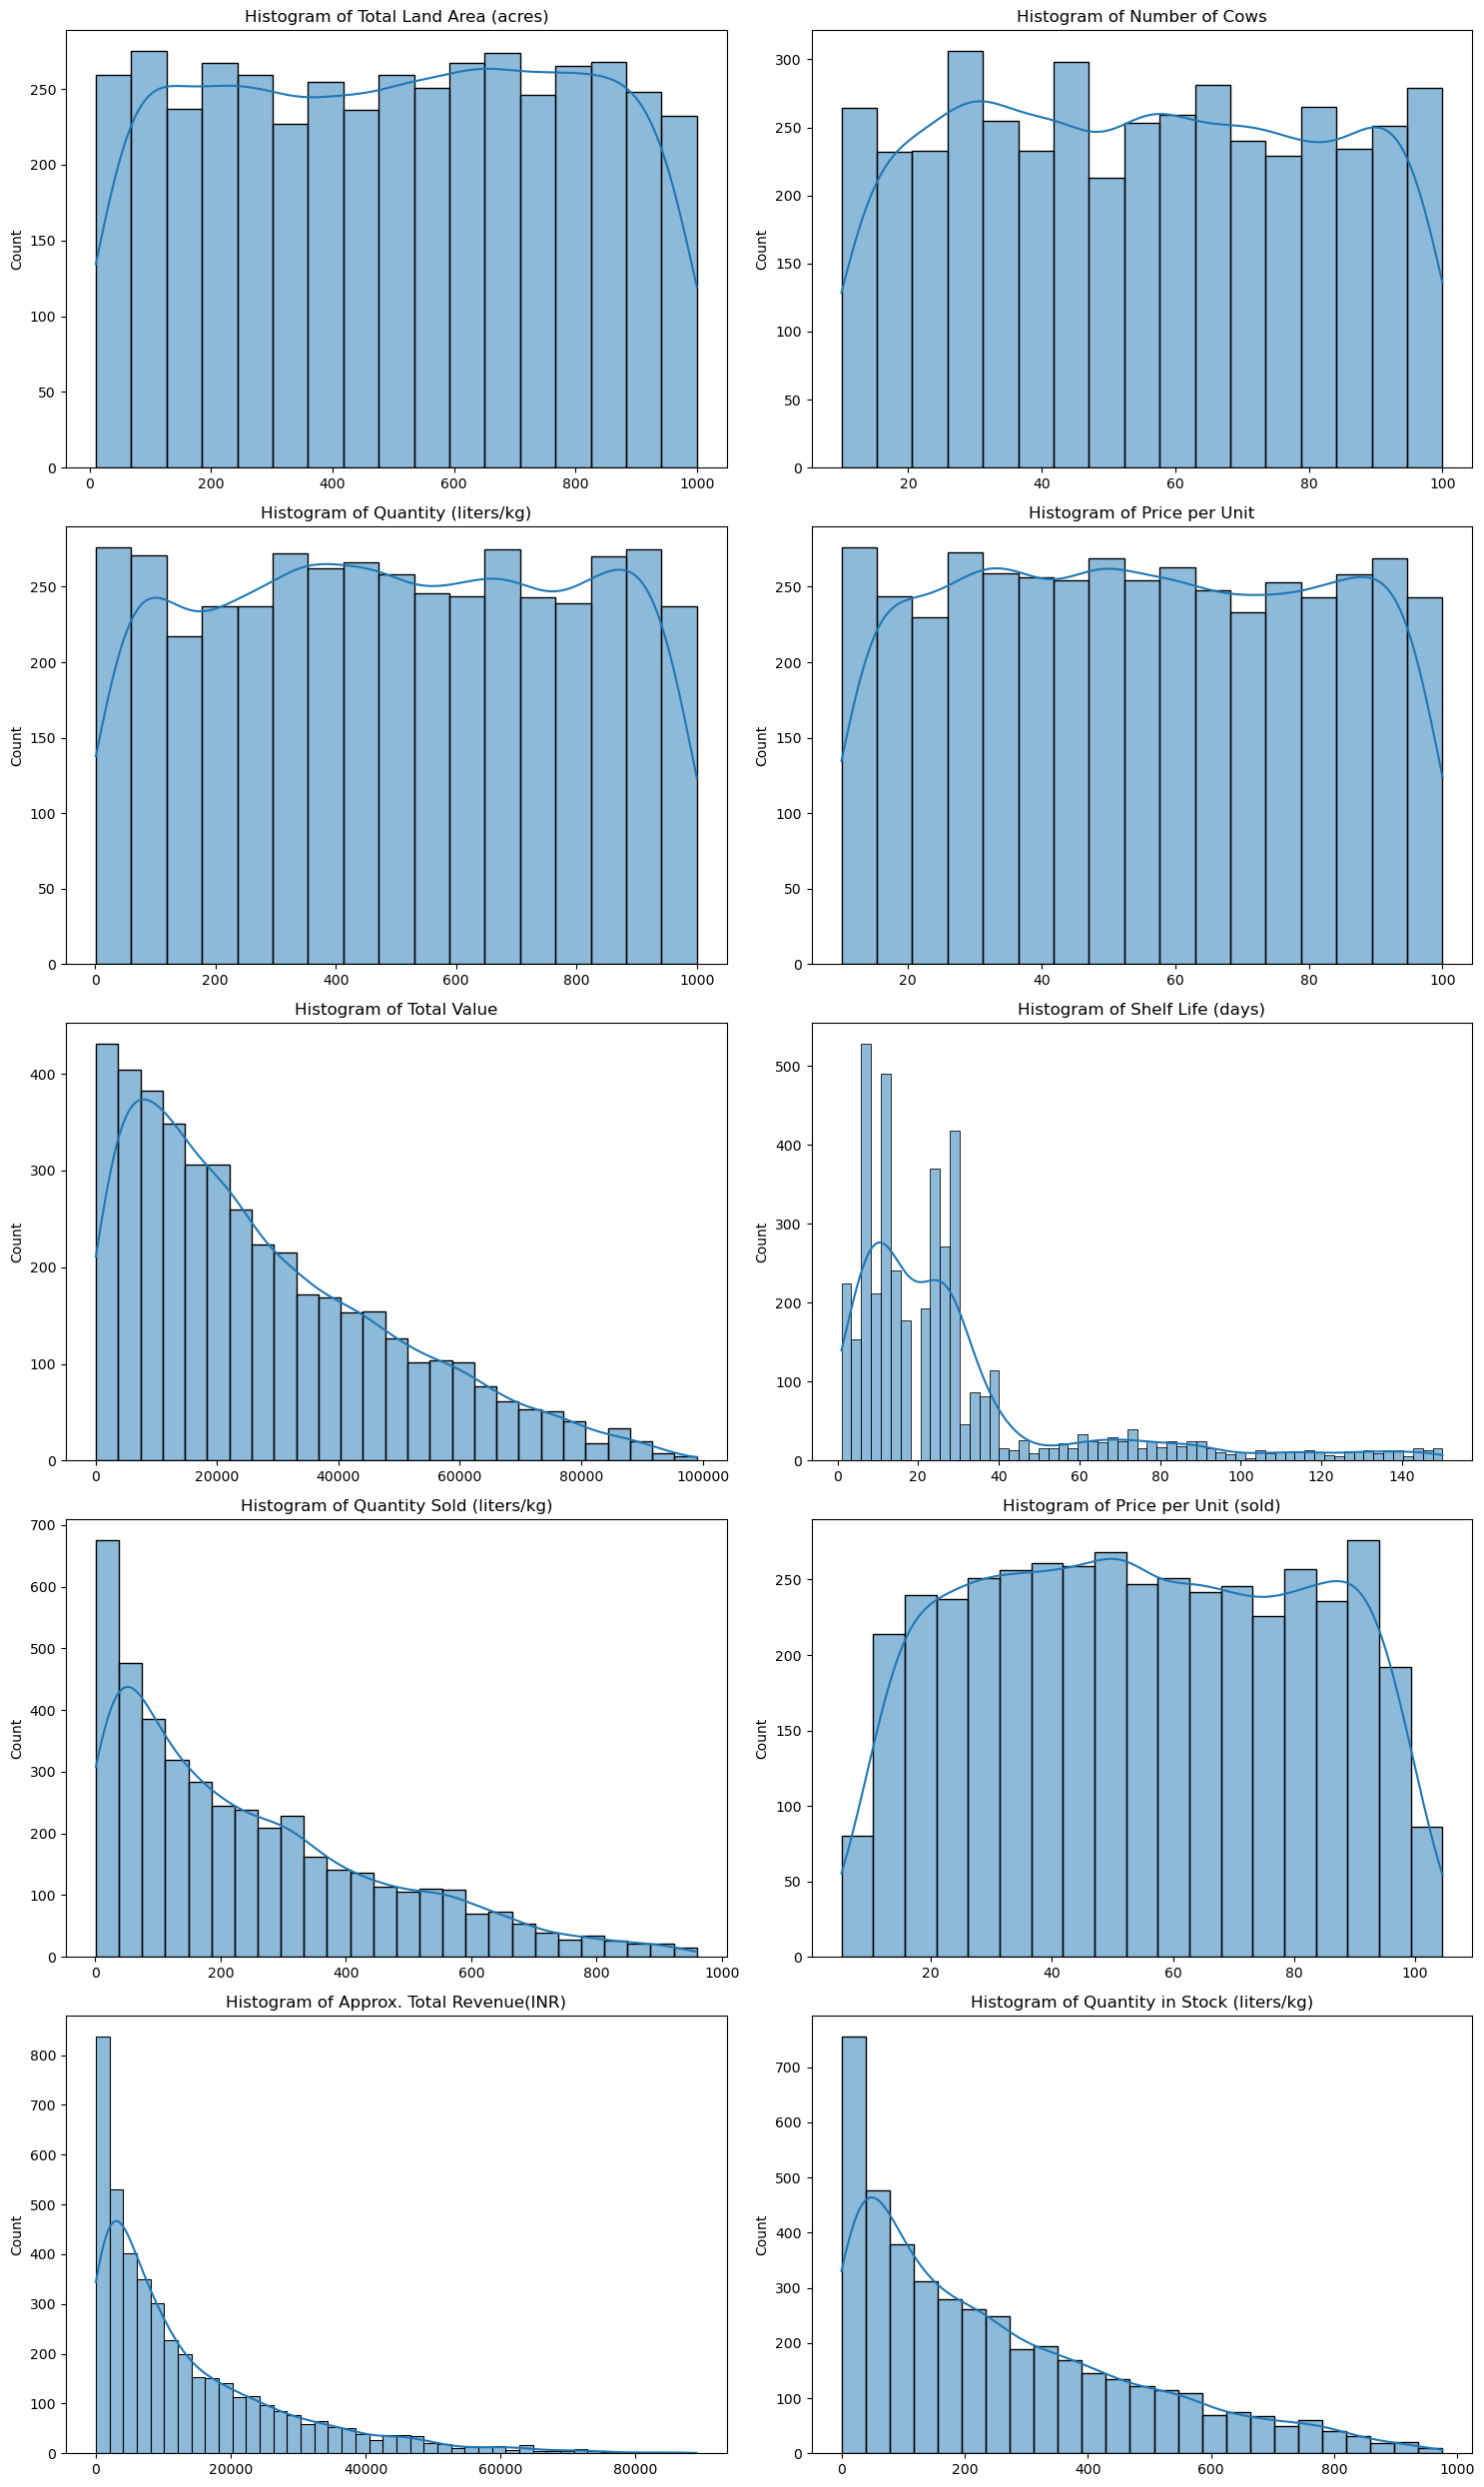

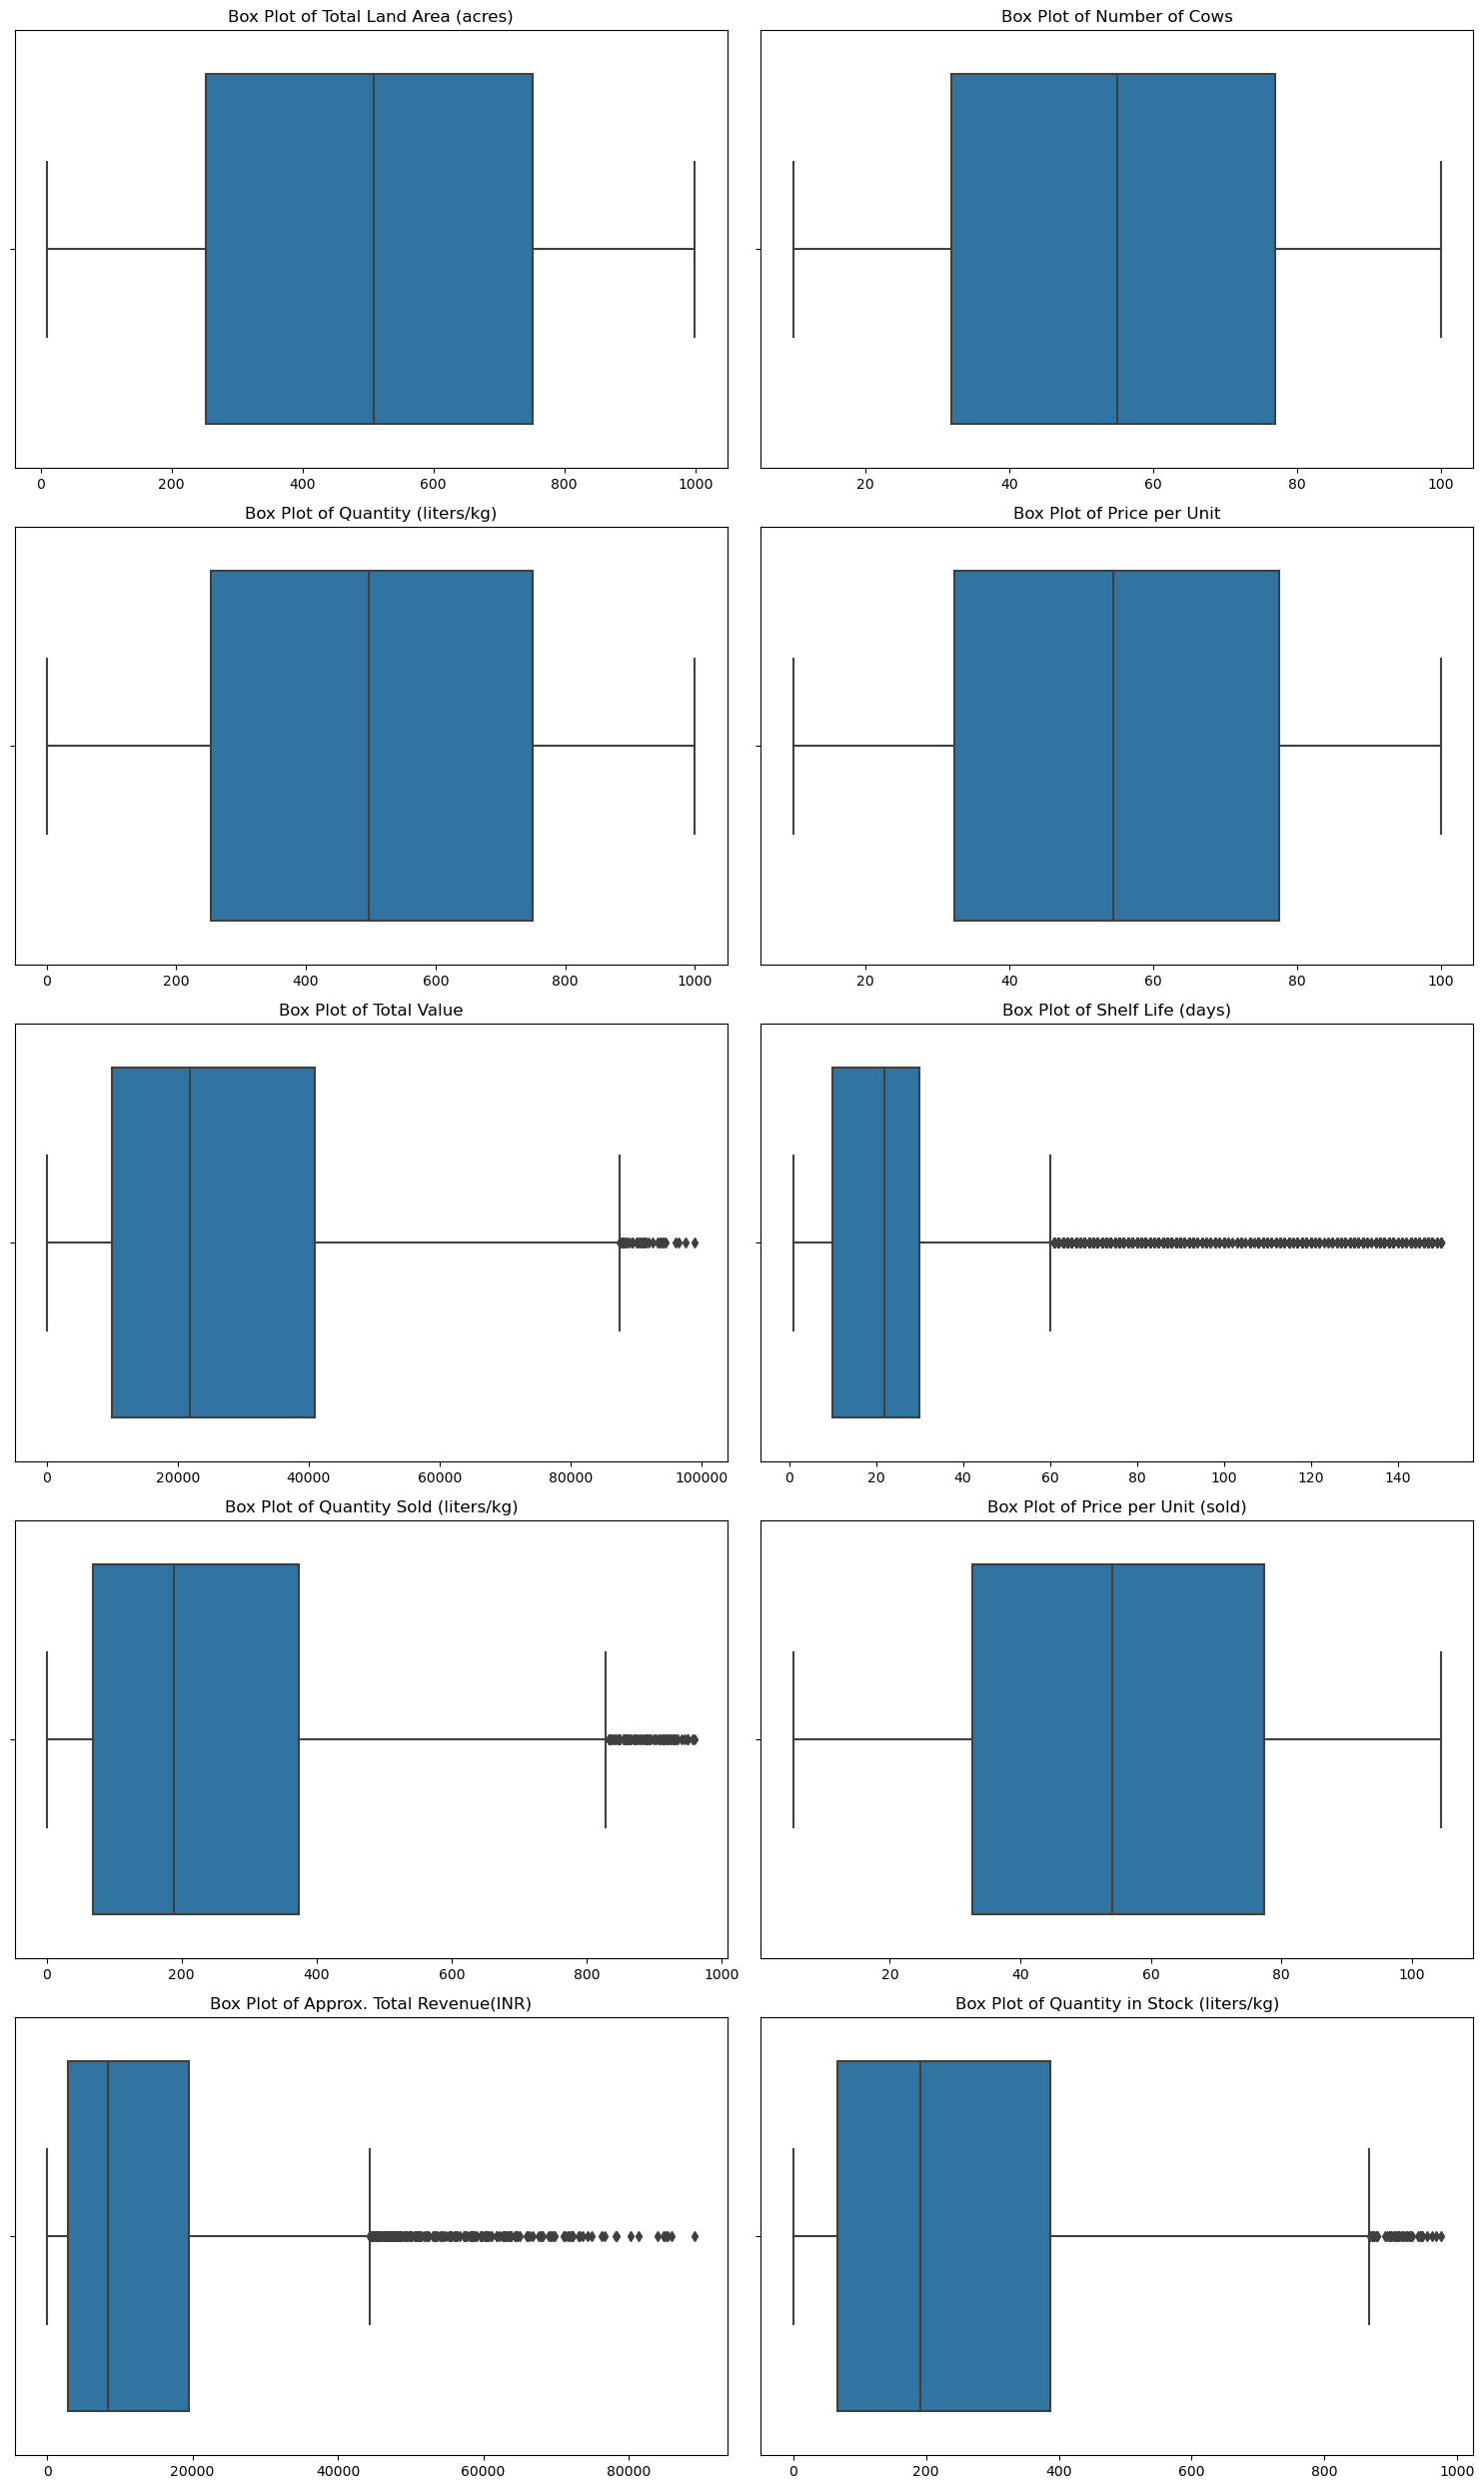

In [6]:
# Bar charts and boxplots for all numerical variables

# Set up the plotting area
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 25))

# List of columns to plot
columns_to_plot = [
    'Total Land Area (acres)', 'Number of Cows', 'Quantity (liters/kg)', 
    'Price per Unit', 'Total Value', 'Shelf Life (days)', 
    'Quantity Sold (liters/kg)', 'Price per Unit (sold)', 
    'Approx. Total Revenue(INR)', 'Quantity in Stock (liters/kg)'
]

# Generate histograms and box plots
for i, column in enumerate(columns_to_plot):
    sns.histplot(df[column], kde=True, ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(f'Histogram of {column}')
    axes[i//2, i%2].set_xlabel('')
    
plt.tight_layout()
plt.show()

# Set up the plotting area for box plots
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 25))

# Generate box plots
for i, column in enumerate(columns_to_plot):
    sns.boxplot(x=df[column], ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(f'Box Plot of {column}')
    axes[i//2, i%2].set_xlabel('')
    
plt.tight_layout()
plt.show()

In [7]:
# Create a DataFrame with only categorical / object columns
categorical_df = df.select_dtypes(include=['object', 'category'])

In [8]:
print(categorical_df.dtypes)

Location             object
Farm Size            object
Date                 object
Product Name         object
Brand                object
Storage Condition    object
Production Date      object
Expiration Date      object
Customer Location    object
Sales Channel        object
dtype: object


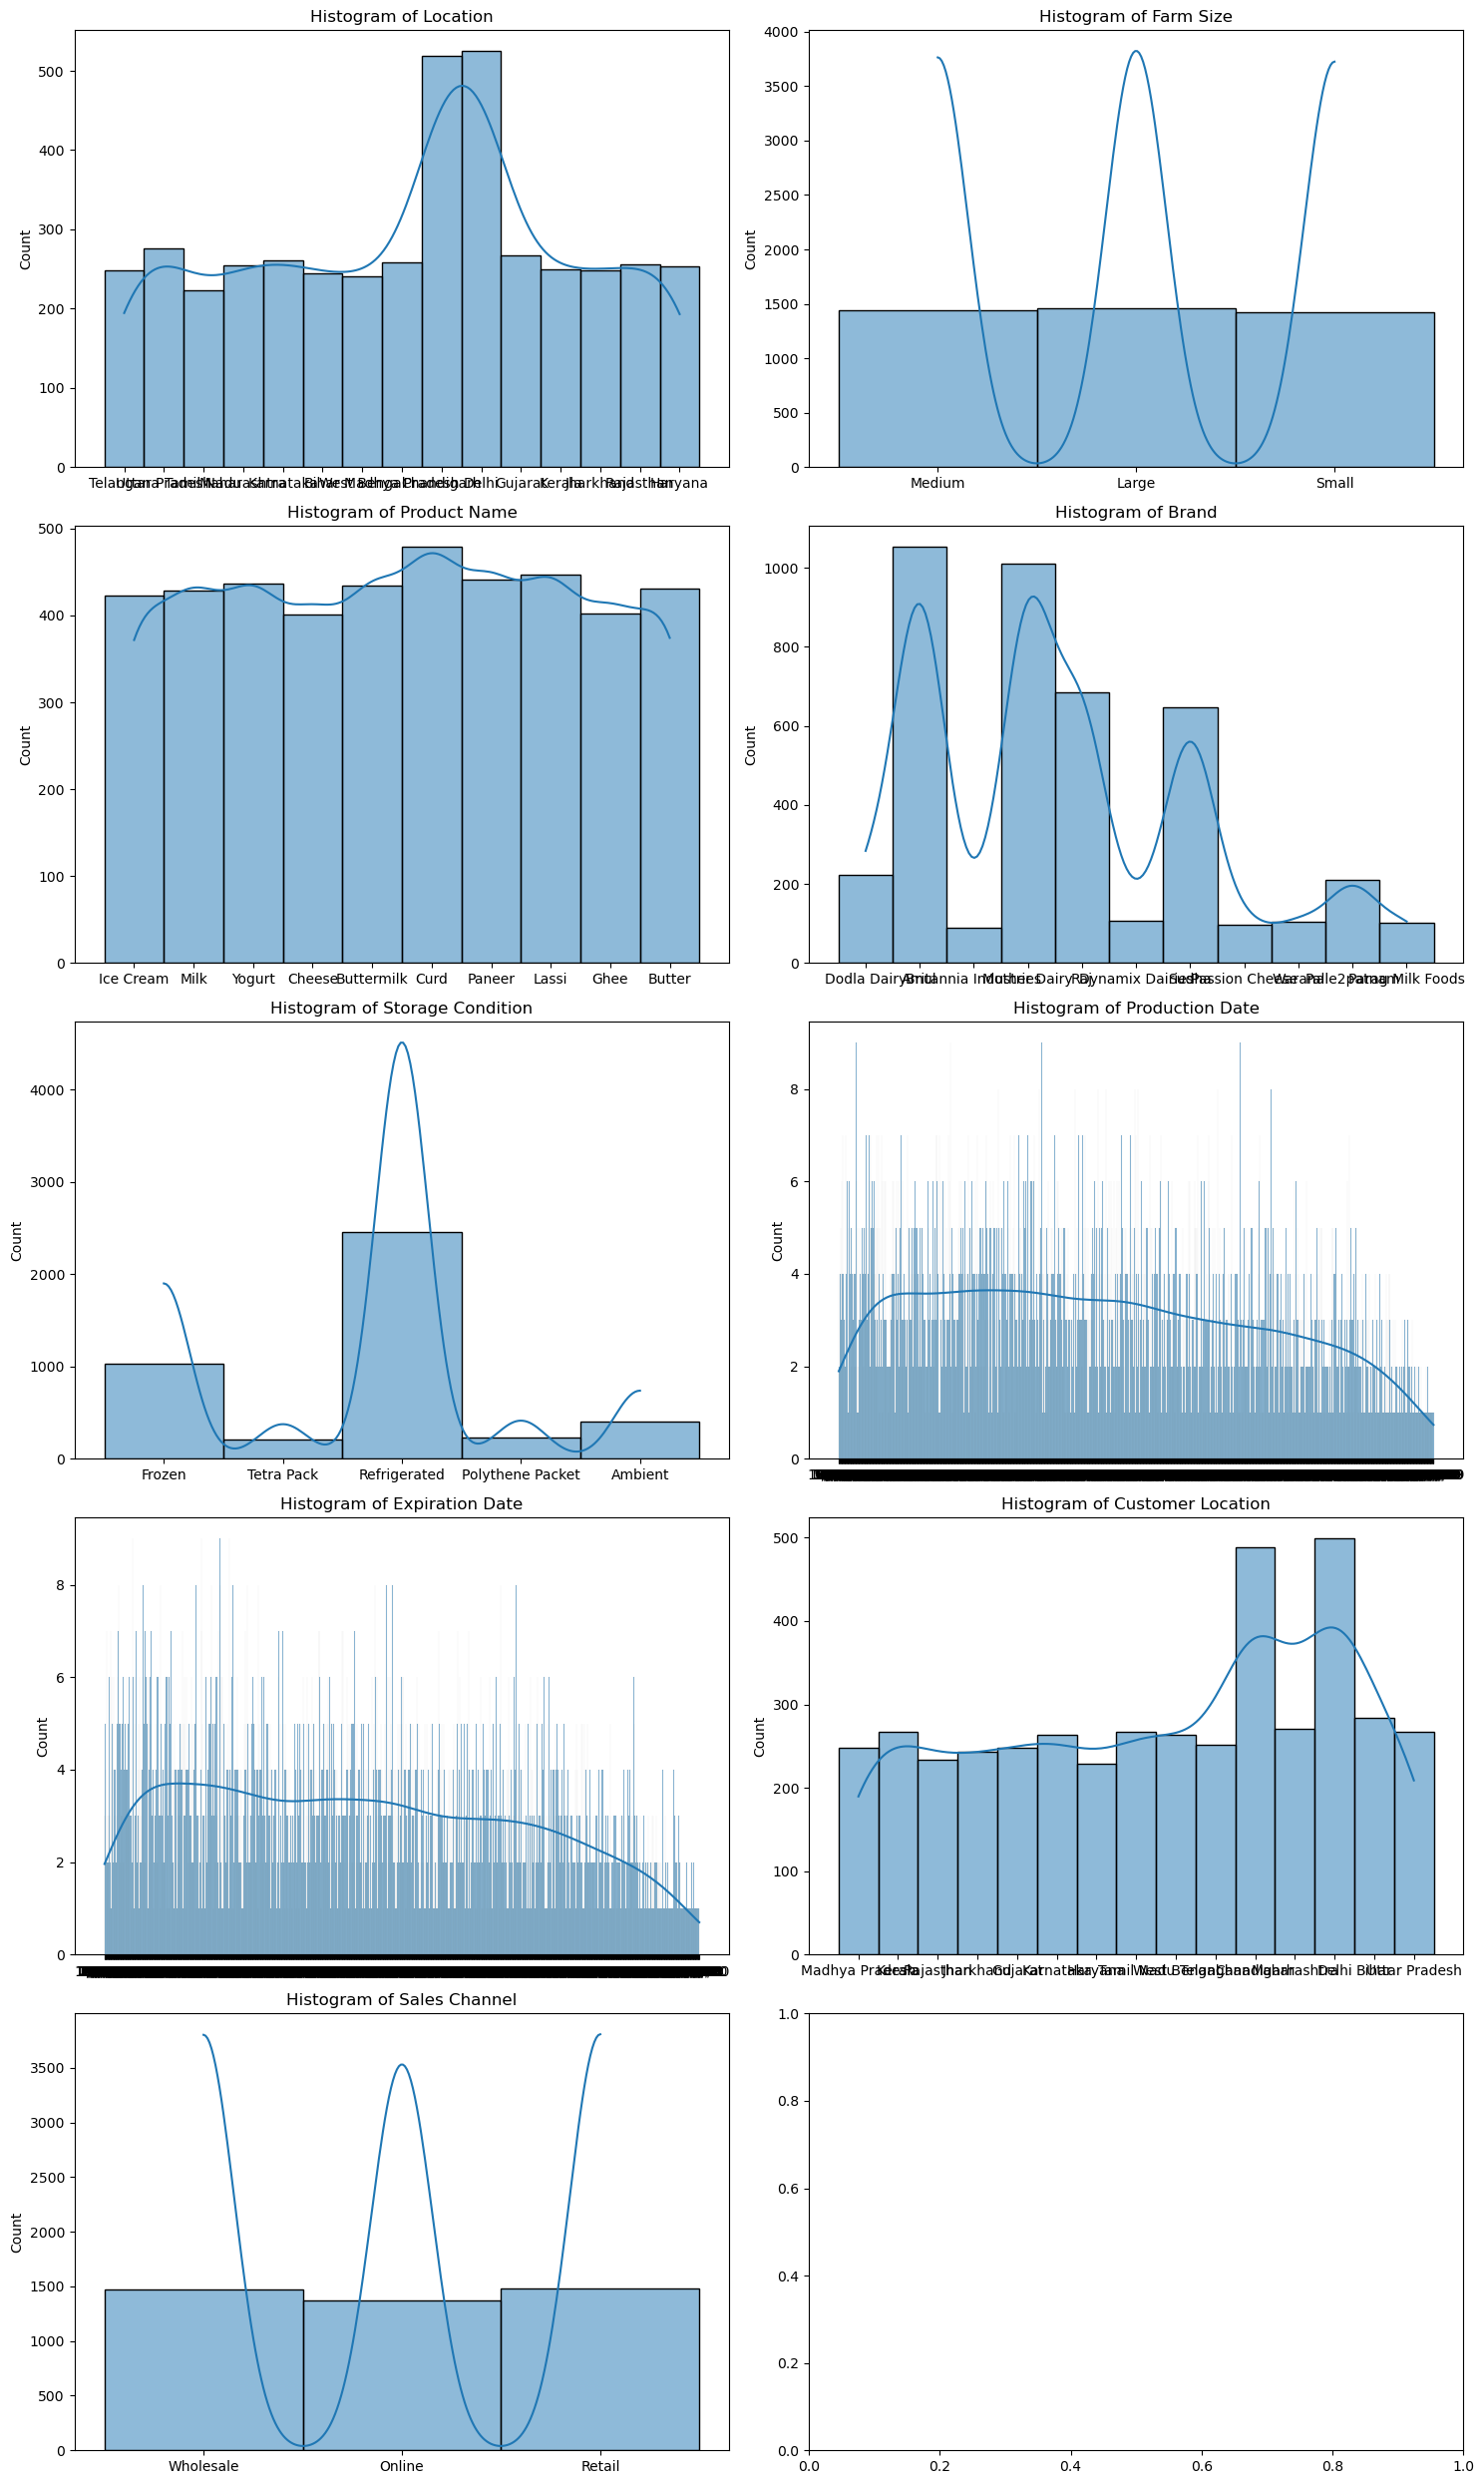

In [9]:
# Set up the plotting area
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 25))

# List of columns to plot
columns_to_plot = [
    'Location', 'Farm Size', 'Product Name', 'Brand', 'Storage Condition', 'Production Date', 'Expiration Date', 'Customer Location', 'Sales Channel'
]

# Generate histograms and box plots
for i, column in enumerate(columns_to_plot):
    sns.histplot(df[column], kde=True, ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(f'Histogram of {column}')
    axes[i//2, i%2].set_xlabel('') 
    
plt.tight_layout()
plt.show()

## 3. Answering Key Questions

### 1) Farm Performance Analysis

#### Production and Sales Performance Based on Farm Size, Land Area, and Location

Questions:
- How does farm size (Small, Medium, Large) impact production and sales?
- What is the relationship between total land area and the number of cows on production output?
- How does geographical location affect production and sales?

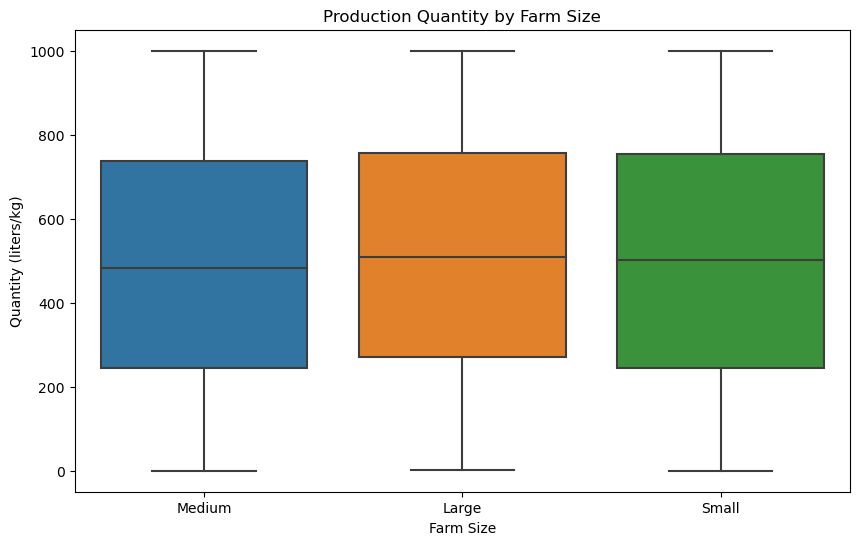

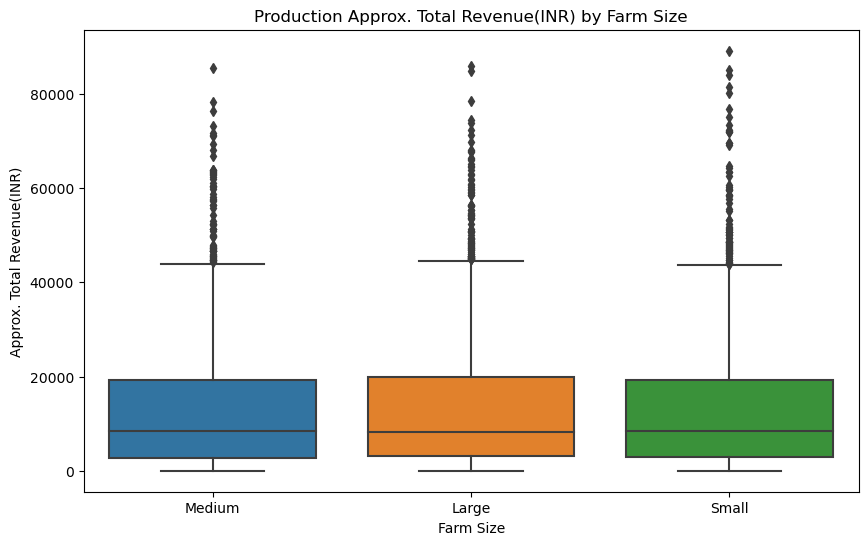

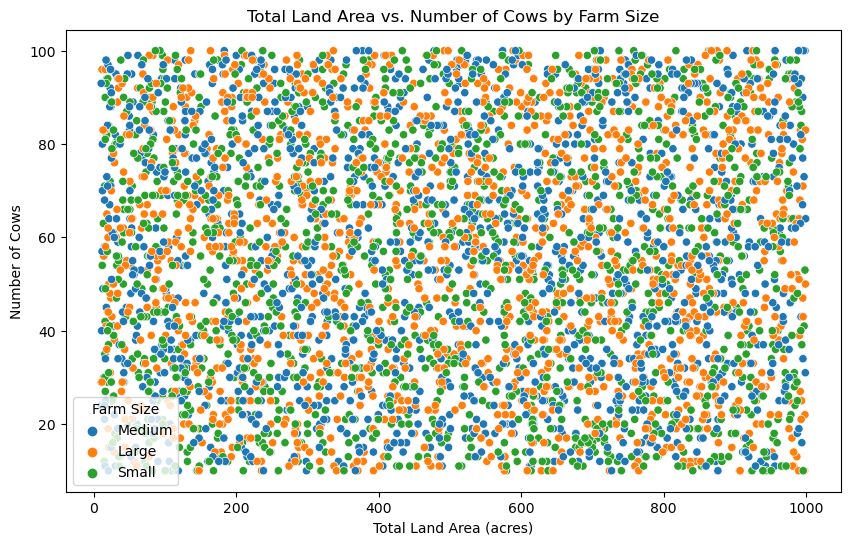

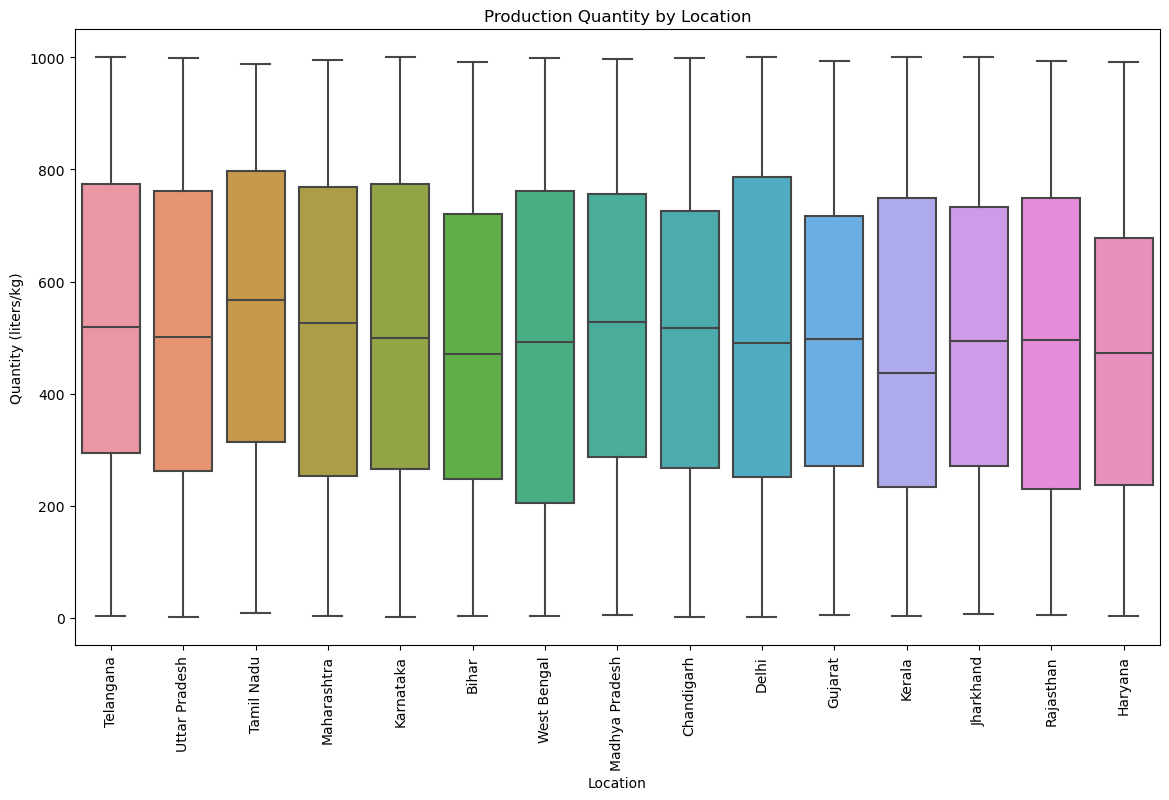

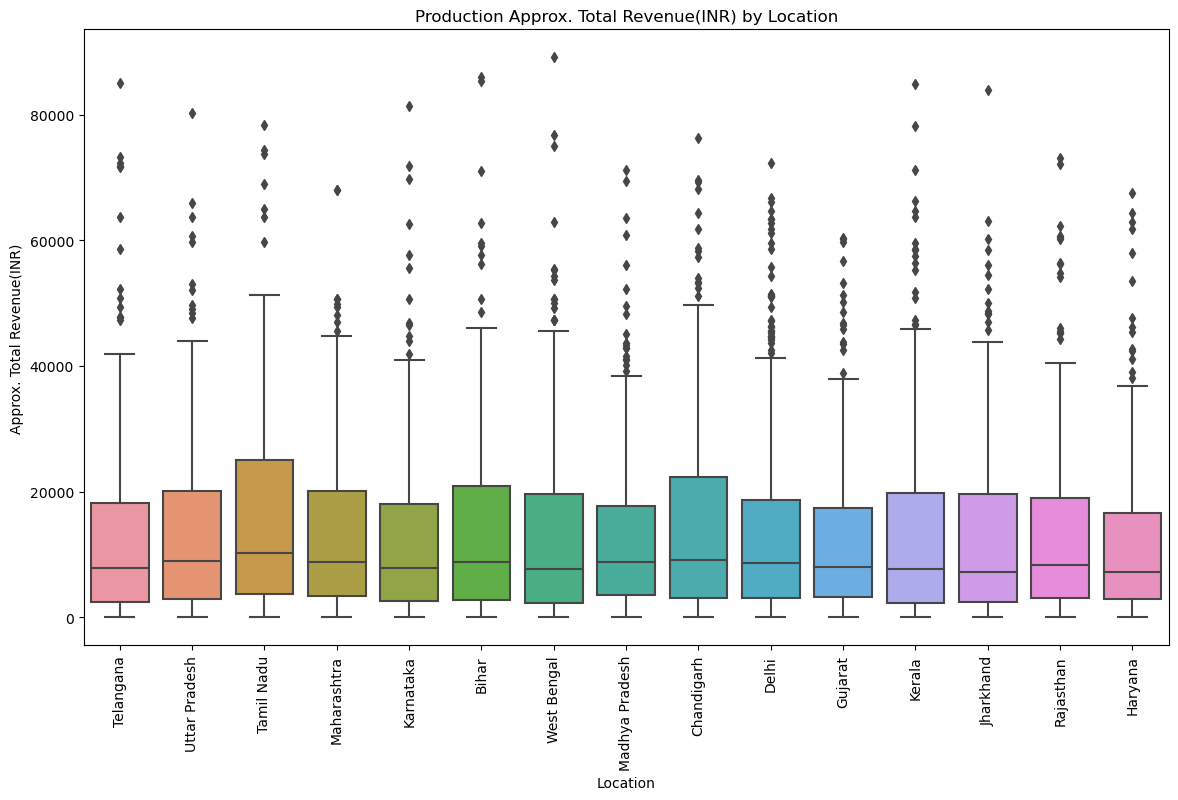

In [10]:
# Analyze production performance by farm size
plt.figure(figsize=(10, 6))
sns.boxplot(x='Farm Size', y='Quantity (liters/kg)', data=df)
plt.title('Production Quantity by Farm Size')
plt.show()

# Analyze sales performance by farm size
plt.figure(figsize=(10, 6))
sns.boxplot(x='Farm Size', y='Approx. Total Revenue(INR)', data=df)
plt.title('Production Approx. Total Revenue(INR) by Farm Size')
plt.show()

# Analyze relationship between total land area and number of cows
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Total Land Area (acres)', y='Number of Cows', hue='Farm Size', data=df)
plt.title('Total Land Area vs. Number of Cows by Farm Size')
plt.show()

# Analyze production by geographical location
plt.figure(figsize=(14, 8))
sns.boxplot(x='Location', y='Quantity (liters/kg)', data=df)
plt.xticks(rotation=90)
plt.title('Production Quantity by Location')
plt.show()

# Analyze sales by geographical location
plt.figure(figsize=(14, 8))
sns.boxplot(x='Location', y='Approx. Total Revenue(INR)', data=df)
plt.xticks(rotation=90)
plt.title('Production Approx. Total Revenue(INR) by Location')
plt.show()

Notes:
No correlation between production quantity/ATR and farm size, number of cows and total acres, and minimal variation when correlating location and quantity/ATR. Will explore Location vs Quantity/Approx. Total Revenue in later notebooks using regression analysis.

          Location  Quantity (liters/kg)
2            Delhi             264116.78
1       Chandigarh             260545.14
13   Uttar Pradesh             138929.46
8   Madhya Pradesh             135215.17
3          Gujarat             133873.94
6        Karnataka             130778.69
9      Maharashtra             129449.65
12       Telangana             127796.76
10       Rajasthan             125243.29
5        Jharkhand             123144.54
7           Kerala             119904.75
14     West Bengal             119844.19
4          Haryana             119478.31
0            Bihar             118832.82
11      Tamil Nadu             118169.25


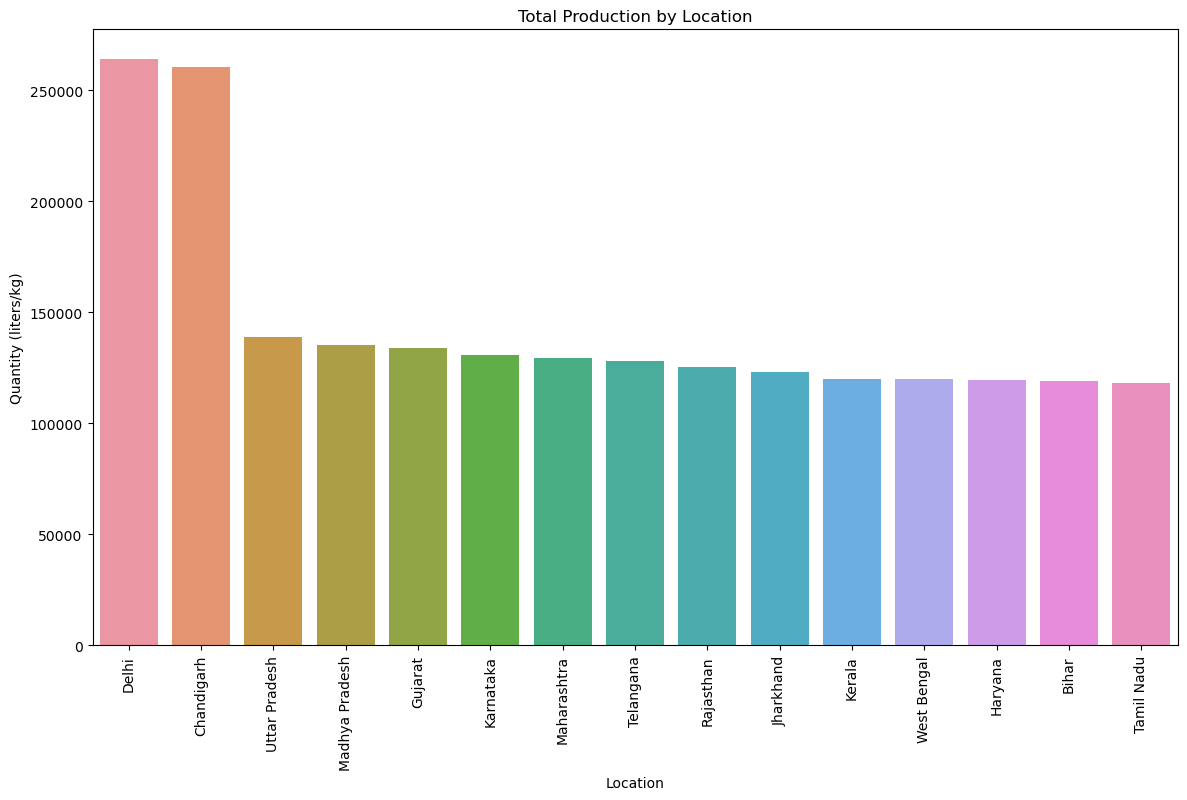

In [11]:
# Group by location and calculate total production and revenue
location_performance = df.groupby('Location').agg({'Quantity (liters/kg)': 'sum'}).reset_index()

# Sort by 'Quantity (liters/kg)' in descending order
location_performance = location_performance.sort_values(by='Quantity (liters/kg)', ascending=False)

print(location_performance)

# Visualize location performance
plt.figure(figsize=(14, 8))
sns.barplot(x='Location', y='Quantity (liters/kg)', data=location_performance)
plt.title('Total Production by Location')
plt.xticks(rotation=90)
plt.show()

          Location  Approx. Total Revenue(INR)
1       Chandigarh                  7538982.35
2            Delhi                  6952125.24
13   Uttar Pradesh                  3705388.56
9      Maharashtra                  3535381.94
7           Kerala                  3485112.52
11      Tamil Nadu                  3455957.32
8   Madhya Pradesh                  3448986.54
0            Bihar                  3446206.42
10       Rajasthan                  3443553.56
12       Telangana                  3367815.11
14     West Bengal                  3350541.68
5        Jharkhand                  3341338.74
3          Gujarat                  3331222.75
6        Karnataka                  3288575.76
4          Haryana                  3043459.37


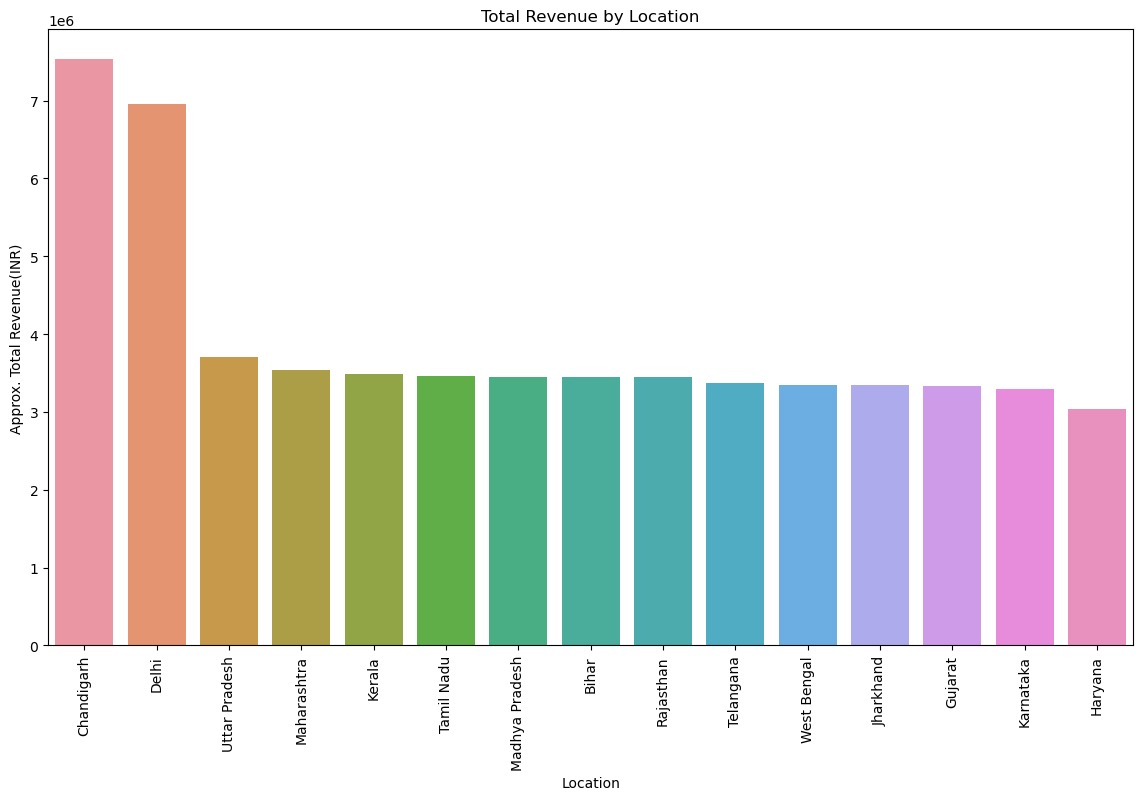

In [12]:
# Group by location and calculate total production and revenue
location_revenue = df.groupby('Location').agg({'Approx. Total Revenue(INR)': 'sum'}).reset_index()

# Sort by 'Quantity (liters/kg)' in descending order
location_revenue = location_revenue.sort_values(by='Approx. Total Revenue(INR)', ascending=False)

print(location_revenue)

# Visualize location revenue
plt.figure(figsize=(14, 8))
sns.barplot(x='Location', y='Approx. Total Revenue(INR)', data=location_revenue)
plt.title('Total Revenue by Location')
plt.xticks(rotation=90)
plt.show()

### 2) Sales and Distribution Patterns

#### Sales Trends and Distribution Patterns for Different Products, Brands, and Regions

Questions:
- What are the top-selling products and brands?
- How do sales volumes and revenues vary across different regions?
- Are there any seasonal trends in sales?

Product Name
Curd      120415
Lassi     112731
Milk      109852
Butter    109578
Paneer    107931
Name: Quantity Sold (liters/kg), dtype: int64


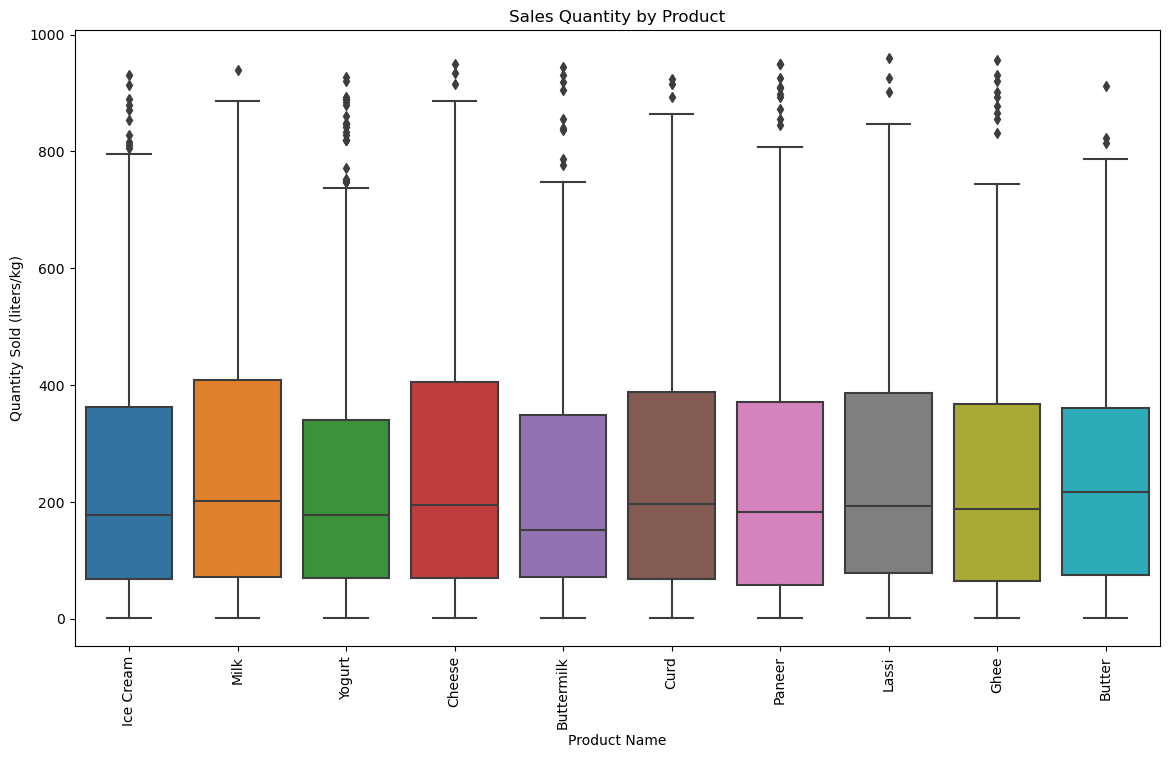

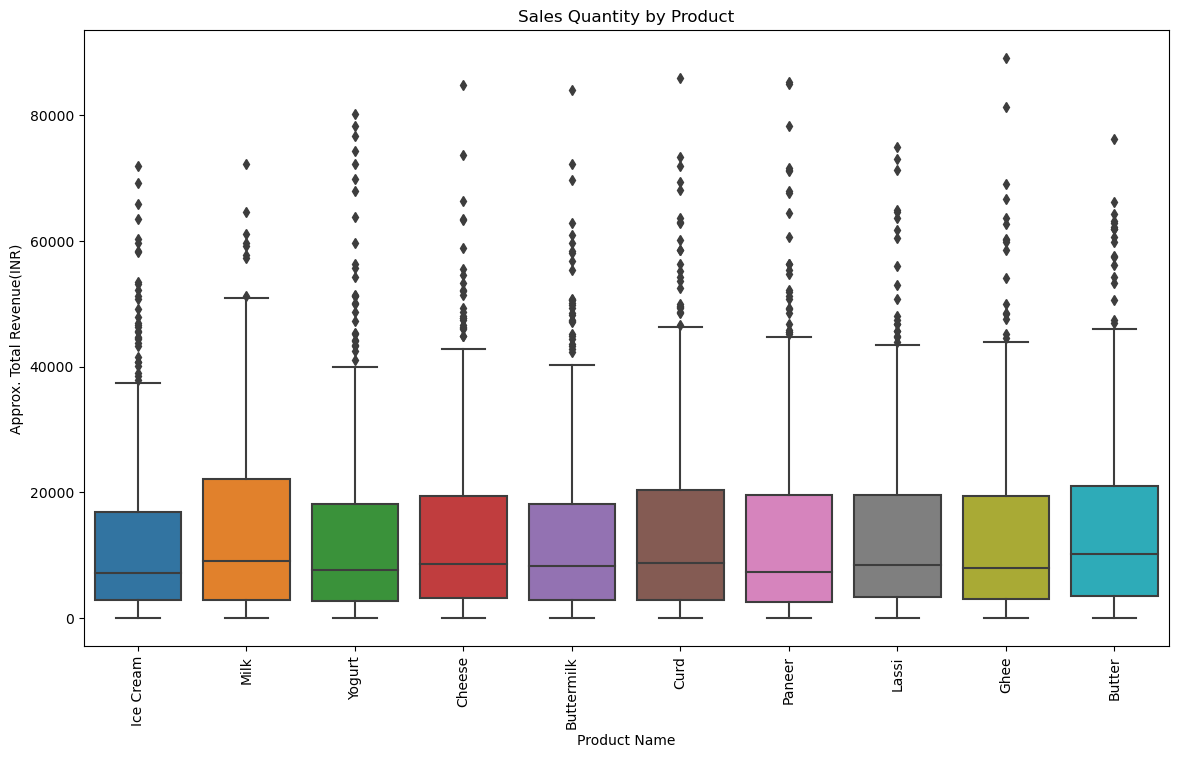

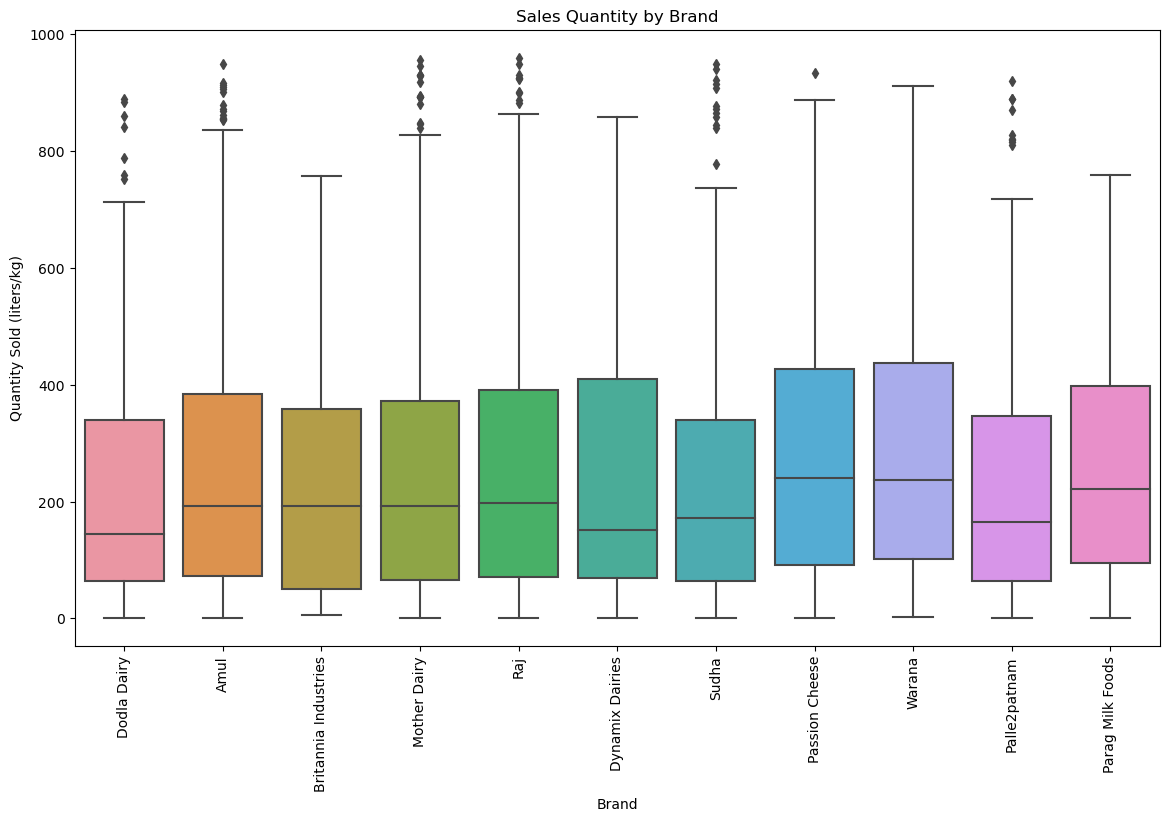

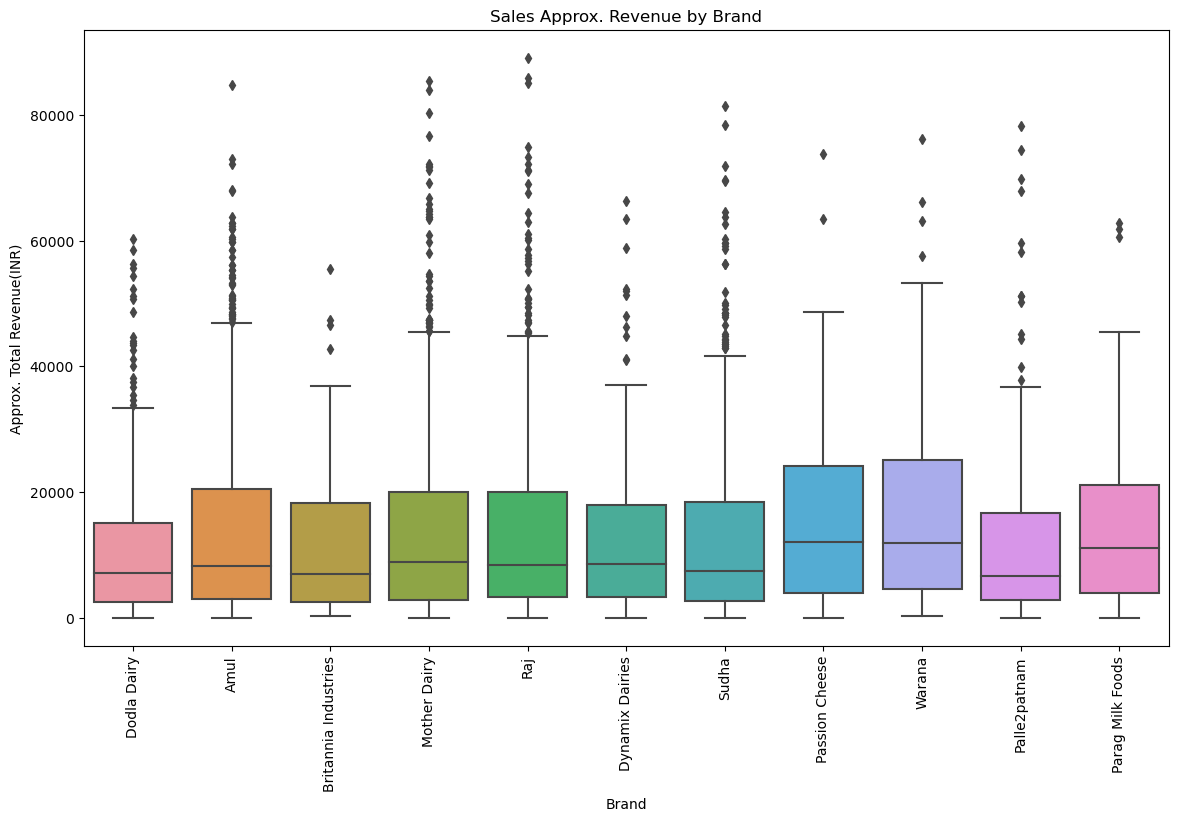

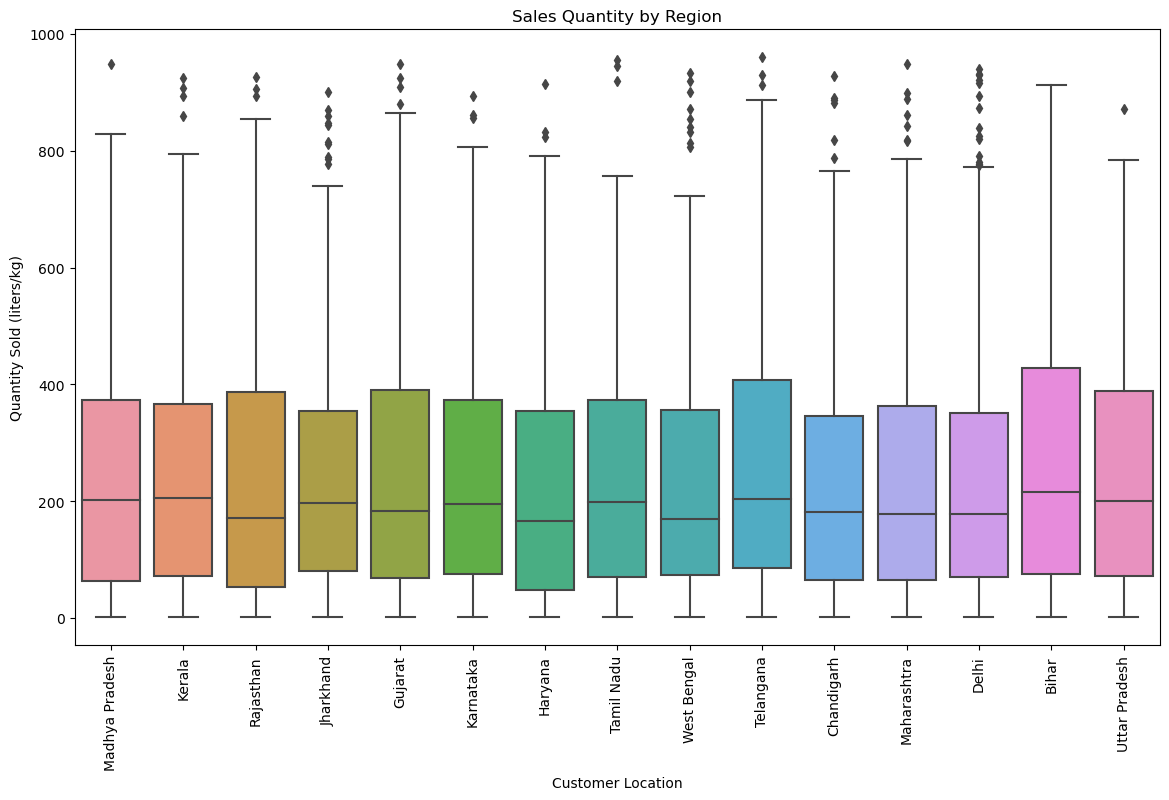

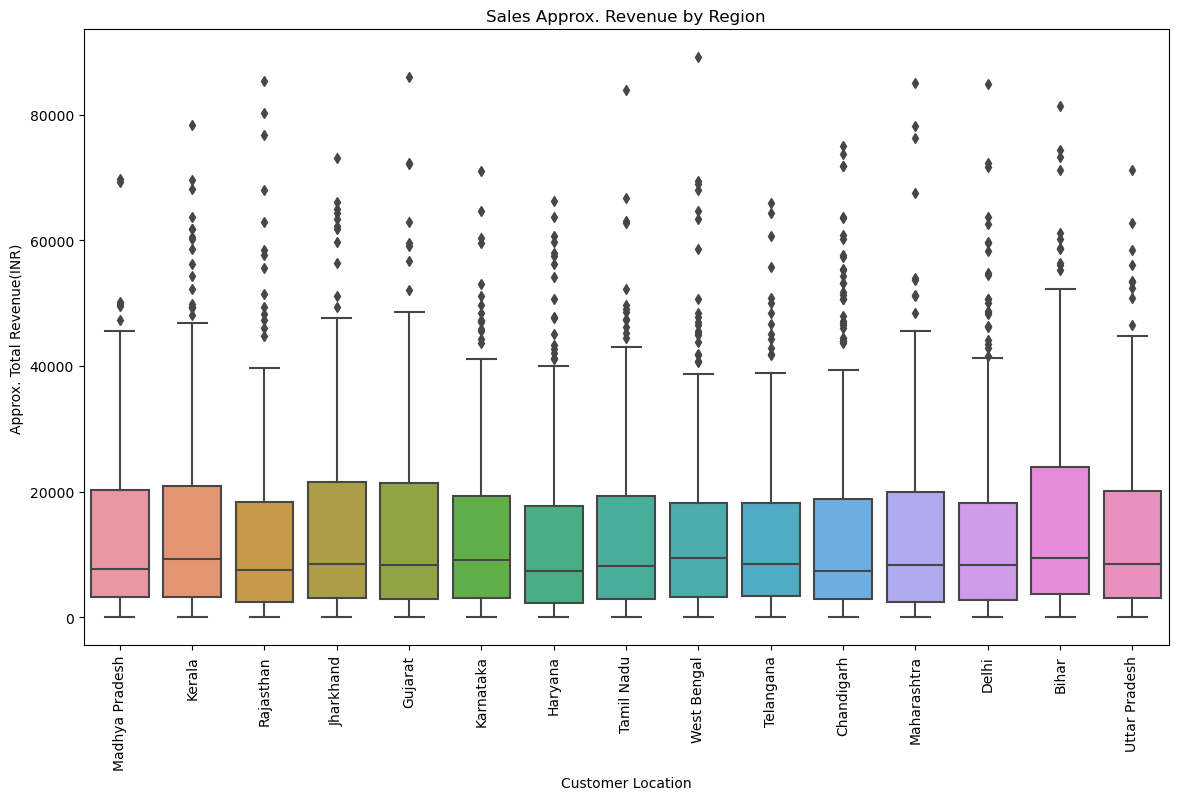

/var/folders/b9/y4g8ppyj2bs49xgy2tjbz9c00000gn/T/ipykernel_78193/4137298428.py:48: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


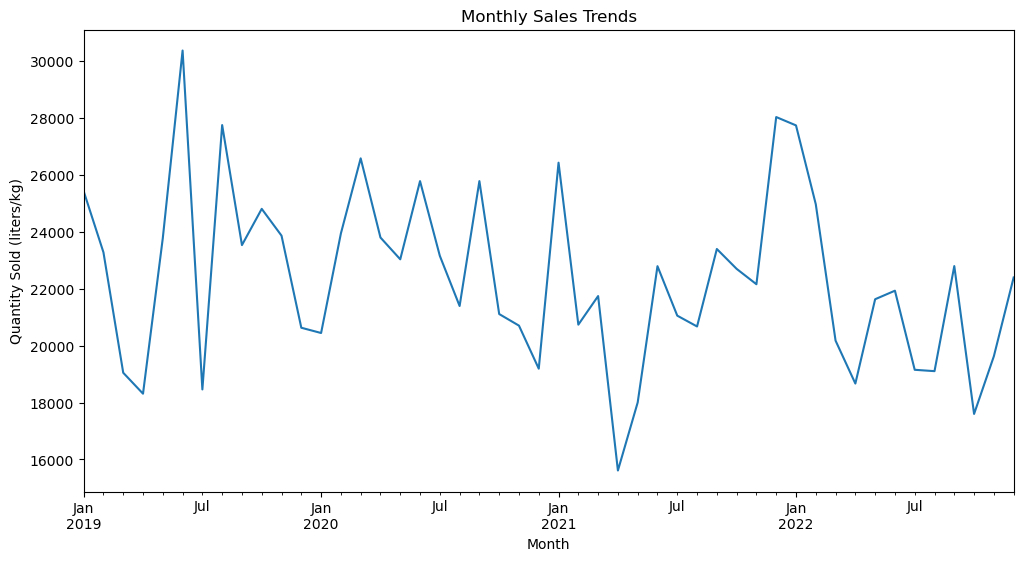

In [13]:
# Top-selling products
top_products = df.groupby('Product Name')['Quantity Sold (liters/kg)'].sum().sort_values(ascending=False)
print(top_products.head())

# Sales by products
plt.figure(figsize=(14, 8))
sns.boxplot(x='Product Name', y='Quantity Sold (liters/kg)', data=df)
plt.xticks(rotation=90)
plt.title('Sales Quantity by Product')
plt.show()

# Revenue by products
plt.figure(figsize=(14, 8))
sns.boxplot(x='Product Name', y='Approx. Total Revenue(INR)', data=df)
plt.xticks(rotation=90)
plt.title('Sales Quantity by Product')
plt.show()

# Sales by brand
plt.figure(figsize=(14, 8))
sns.boxplot(x='Brand', y='Quantity Sold (liters/kg)', data=df)
plt.xticks(rotation=90)
plt.title('Sales Quantity by Brand')
plt.show()

# Revenue by brand
plt.figure(figsize=(14, 8))
sns.boxplot(x='Brand', y='Approx. Total Revenue(INR)', data=df)
plt.xticks(rotation=90)
plt.title('Sales Approx. Revenue by Brand')
plt.show()

# Sales by region
plt.figure(figsize=(14, 8))
sns.boxplot(x='Customer Location', y='Quantity Sold (liters/kg)', data=df)
plt.xticks(rotation=90)
plt.title('Sales Quantity by Region')
plt.show()

# Revenue by region
plt.figure(figsize=(14, 8))
sns.boxplot(x='Customer Location', y='Approx. Total Revenue(INR)', data=df)
plt.xticks(rotation=90)
plt.title('Sales Approx. Revenue by Region')
plt.show()

# Sales trends over time
df['Date'] = pd.to_datetime(df['Date'])
sales_trends = df.groupby(df['Date'].dt.to_period('M'))['Quantity Sold (liters/kg)'].sum()
sales_trends.plot(figsize=(12, 6))
plt.title('Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Quantity Sold (liters/kg)')
plt.show()

/Users/carolinelasersohn/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/var/folders/b9/y4g8ppyj2bs49xgy2tjbz9c00000gn/T/ipykernel_78193/3554101422.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels, rotation=0)


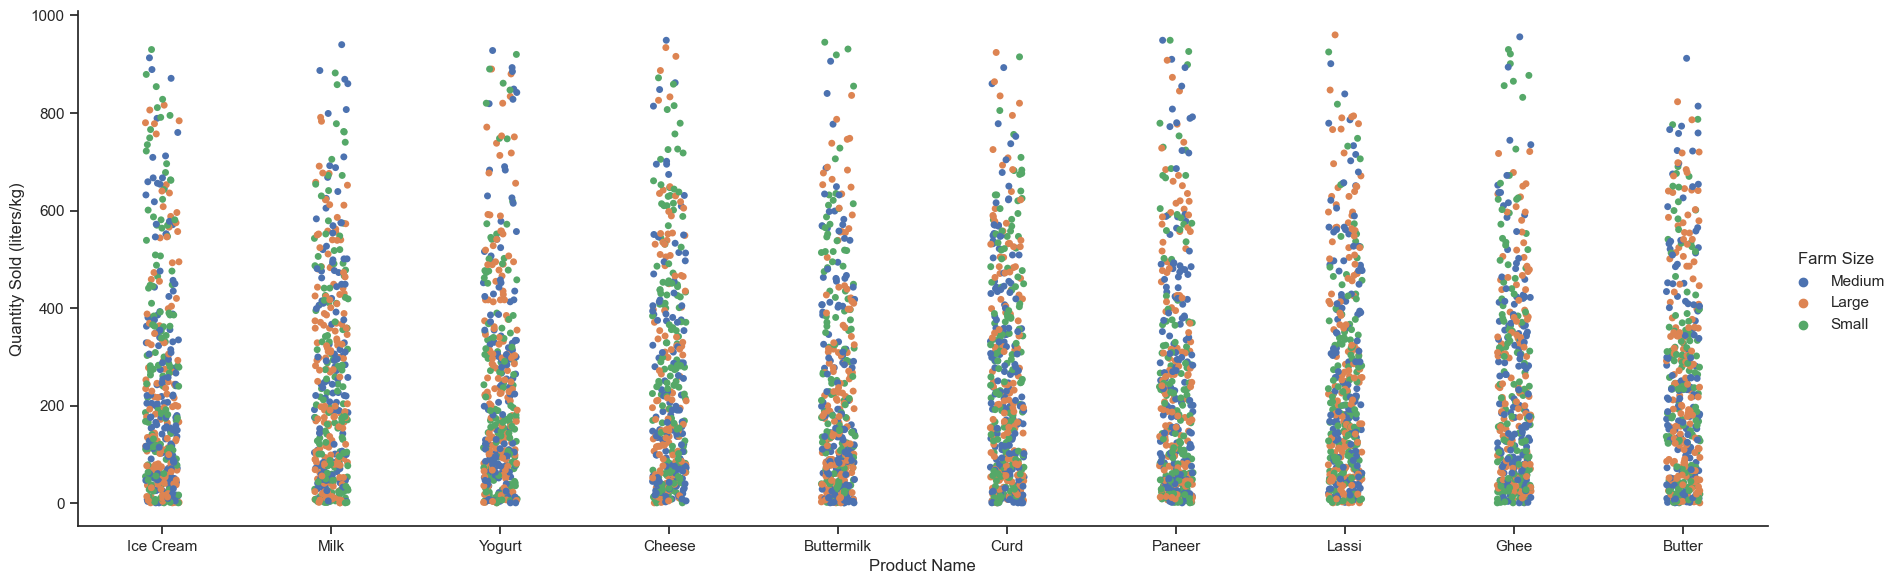

In [14]:
# Catplot for "Product Name" and "Quantity Sold"

import textwrap

# Function to wrap text for labels
def wrap_labels(ax, width):
    labels = [textwrap.fill(label.get_text(), width) for label in ax.get_xticklabels()]
    ax.set_xticklabels(labels, rotation=0)

# Set the style
sns.set(style="ticks")

# Create the categorical plot with specified figure size
catplot_pn_qs_fs = sns.catplot(x="Product Name", y="Quantity Sold (liters/kg)", hue="Farm Size", data=df, height=6, aspect=3)

# Get the current axis
ax = catplot_pn_qs_fs.ax

# Wrap x-axis labels
wrap_labels(ax, 10)  # Adjust the width as needed

# Show the plot
plt.show()

Notes: No clear standouts or interesting correlations for each graph. Monthly sales trends seem to sometimes have spikes around Jan, and spikes around June with a drop in July. Want to further explore the count of each product per farm size. 

### 3) Storage and Shelf Life Impact

#### Impact of Shelf Life and Storage Conditions on Product Quality and Sales

Questions:
- How does the shelf life of products affect their sales and quality?
- What is the impact of different storage conditions on sales?

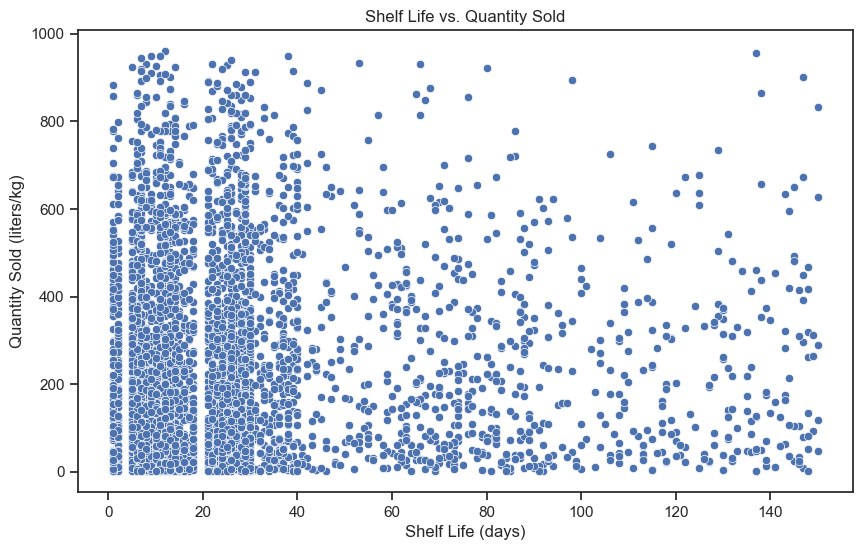

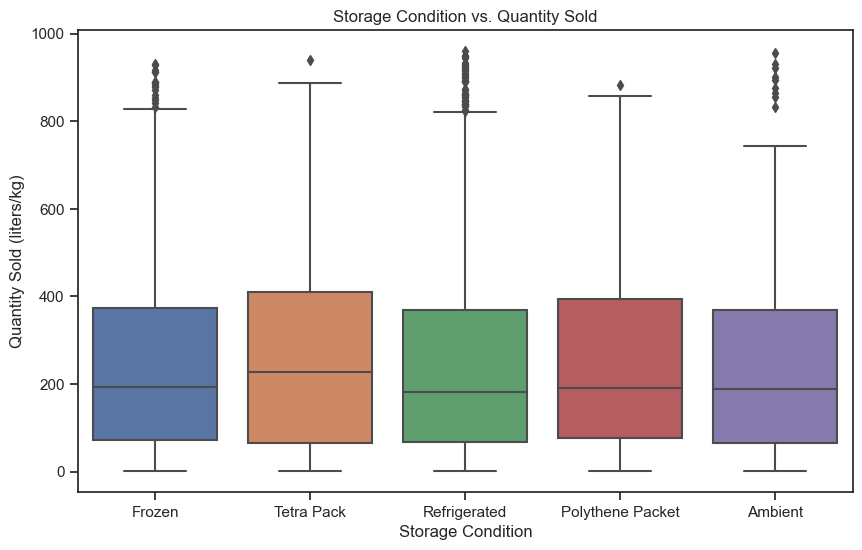

In [15]:
# Impact of shelf life on sales
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Shelf Life (days)', y='Quantity Sold (liters/kg)', data=df)
plt.title('Shelf Life vs. Quantity Sold')
plt.show()

# Impact of storage conditions on sales
plt.figure(figsize=(10, 6))
sns.boxplot(x='Storage Condition', y='Quantity Sold (liters/kg)', data=df)
plt.title('Storage Condition vs. Quantity Sold')
plt.show()

<Axes: xlabel='Shelf Life (days)', ylabel='Count'>

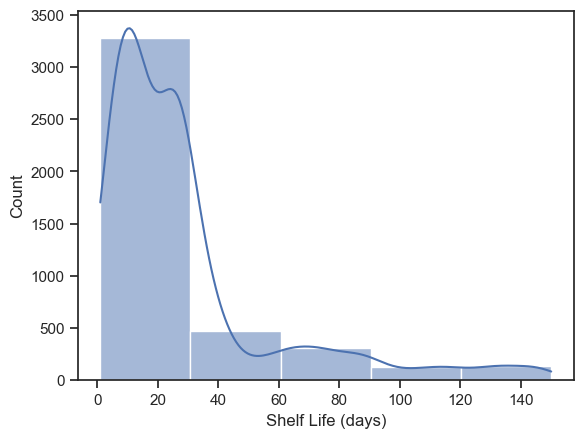

In [16]:
# Histogram for 'Shelf Life (days)'
sns.histplot(df['Shelf Life (days)'], bins = 5, kde = True)

Notes: Most prouducts have a shelf life of below 30 days. There are more refigerated items, but the quantity sold for each storage condition are similar.

### 4) Customer and Sales Channel Analysis

#### Segment Customers and Analyze Sales Across Different Channels

Questions:
- How do sales channels (Retail, Wholesale, Online) compare in terms of sales volume and revenue?
- What are the buying behaviors of customers from different locations?

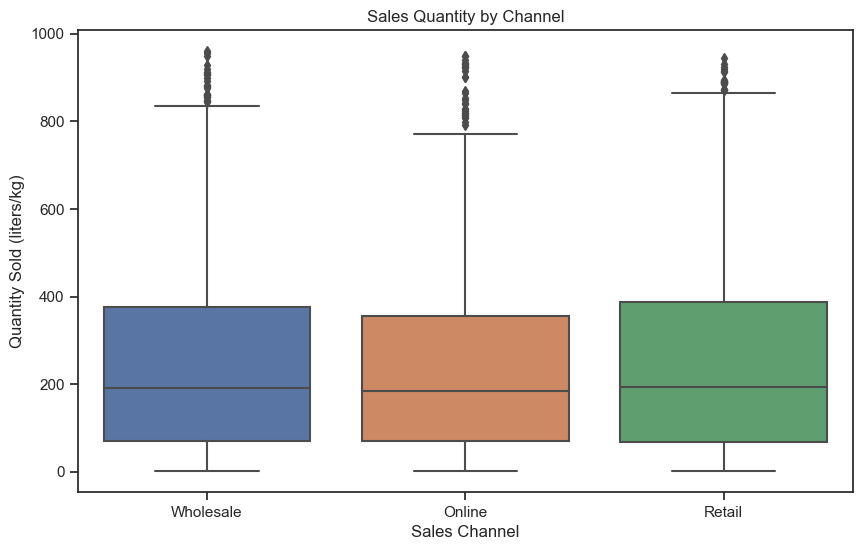

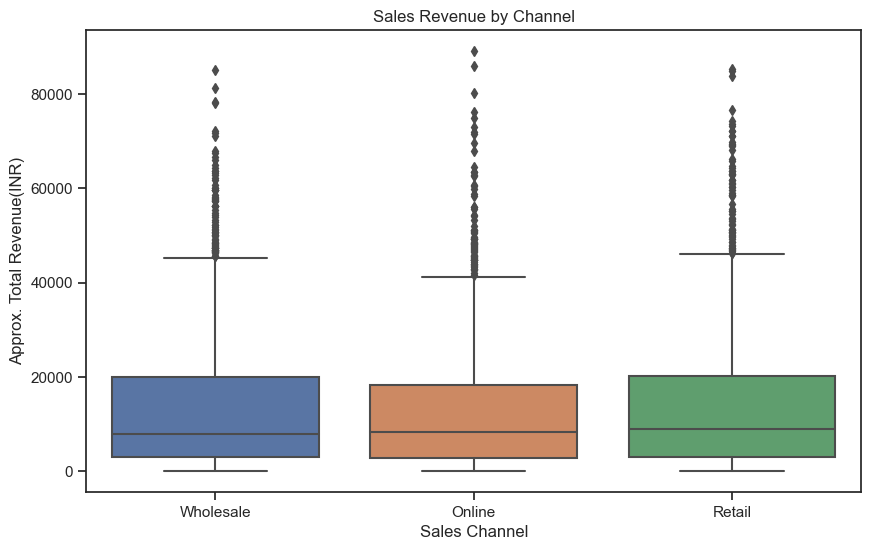

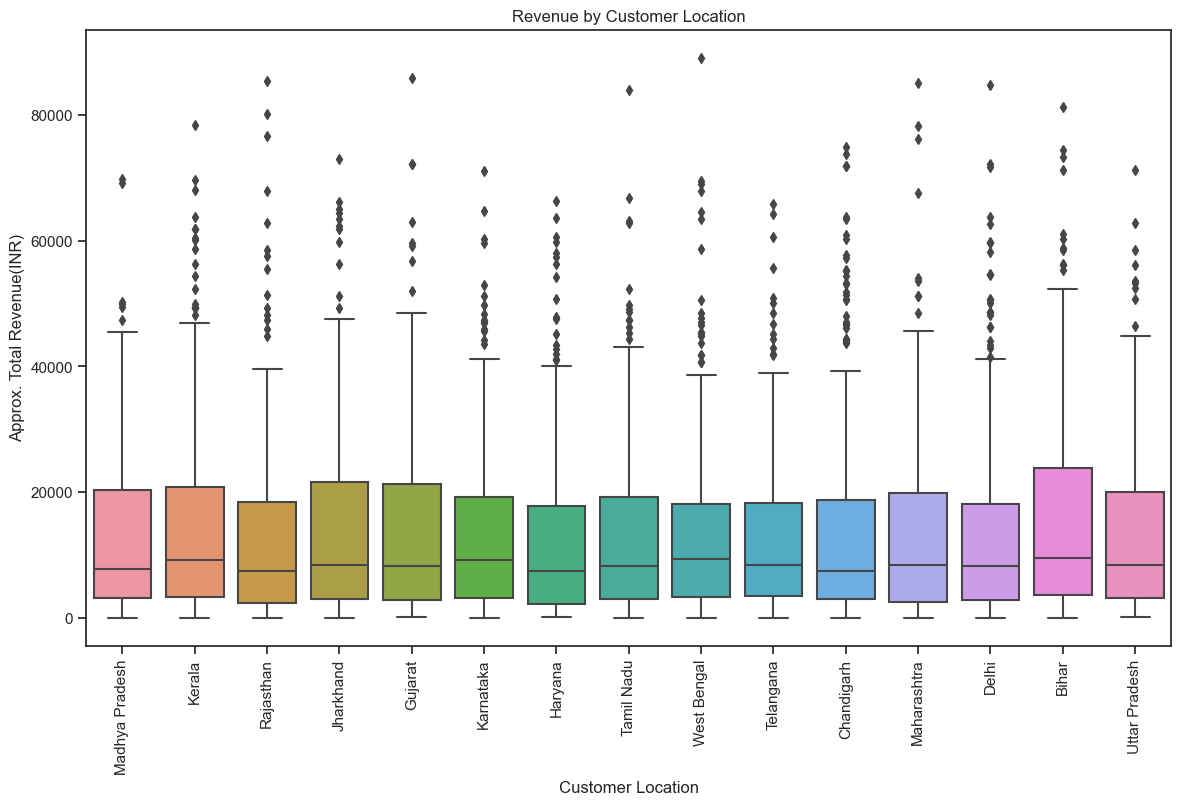

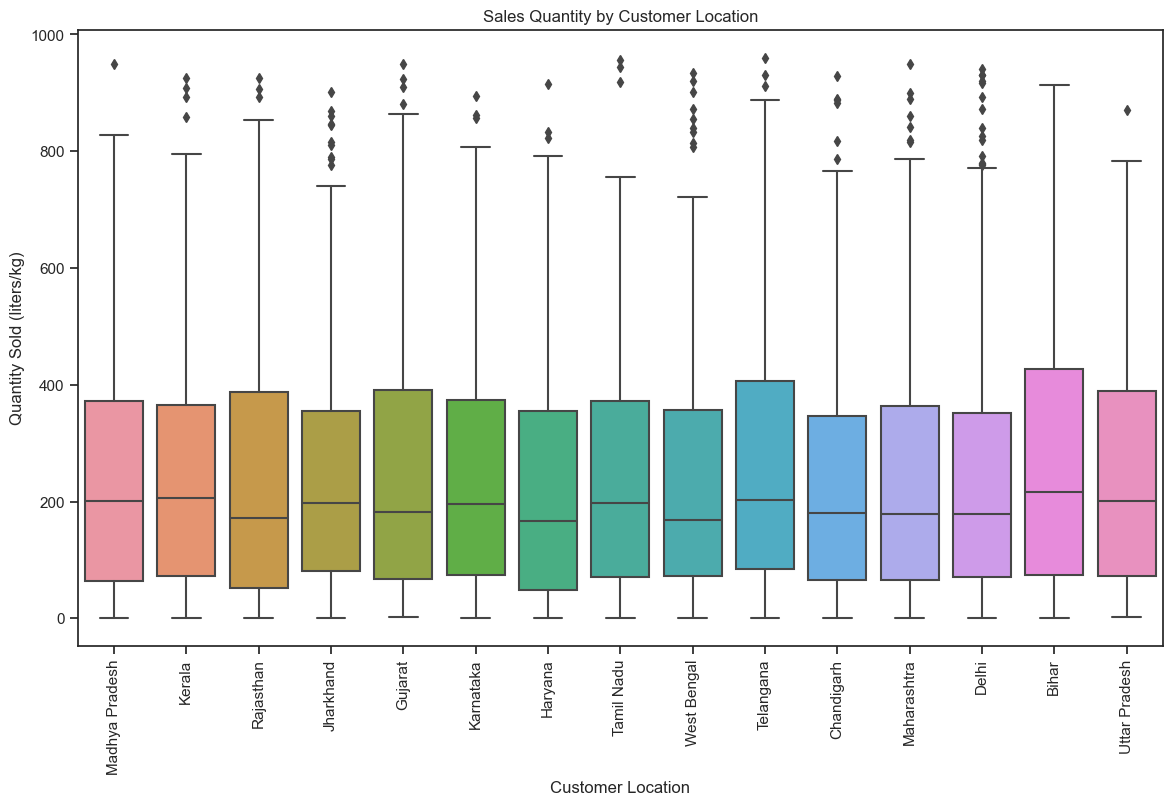

In [17]:
# Sales by channel
plt.figure(figsize=(10, 6))
sns.boxplot(x='Sales Channel', y='Quantity Sold (liters/kg)', data=df)
plt.title('Sales Quantity by Channel')
plt.show()

# Revenue by channel
plt.figure(figsize=(10, 6))
sns.boxplot(x='Sales Channel', y='Approx. Total Revenue(INR)', data=df)
plt.title('Sales Revenue by Channel')
plt.show()

# Revenue by customer location analysis
plt.figure(figsize=(14, 8))
sns.boxplot(x='Customer Location', y='Approx. Total Revenue(INR)', data=df)
plt.xticks(rotation=90)
plt.title('Revenue by Customer Location')
plt.show()

# Customer location analysis
plt.figure(figsize=(14, 8))
sns.boxplot(x='Customer Location', y='Quantity Sold (liters/kg)', data=df)
plt.xticks(rotation=90)
plt.title('Sales Quantity by Customer Location')
plt.show()

Notes: No clear variation between Sales Channels and Quantity Sold/Approx.Revenue, and Customer Location and Quantity Sold/ATR. Will analyze further in later notebooks using regression analysis.

### 5) Inventory Management 

#### Monitor Stock Levels, Reorder Quantities, and Optimize Inventory Management

Questions:
- What are the current stock levels for each product?
- Which products are at risk of stockouts or overstock situations?
- What are the optimal reorder quantities?

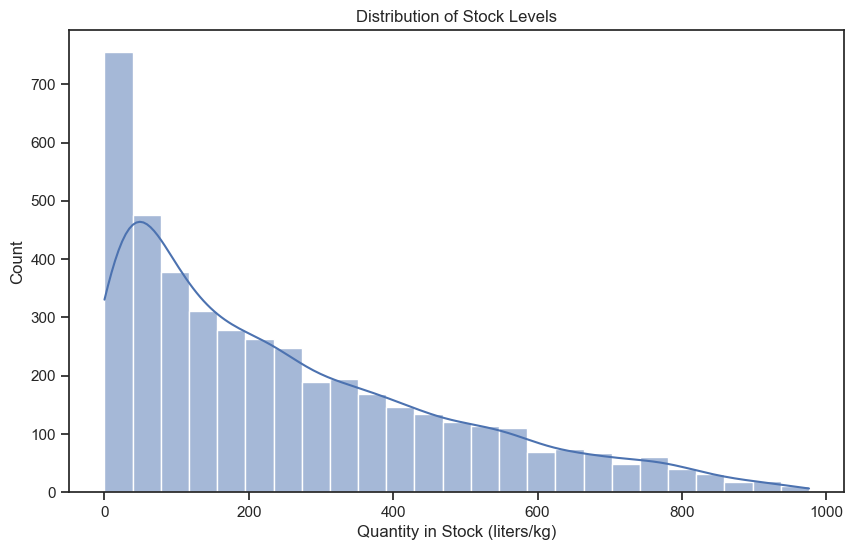

Products at risk of stockouts: 918


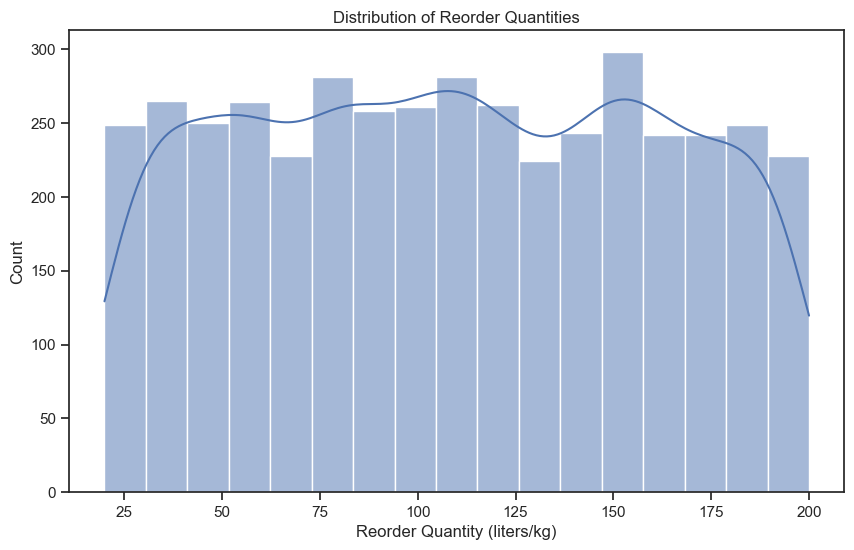

In [18]:
# Current stock levels
plt.figure(figsize=(10, 6))
sns.histplot(df['Quantity in Stock (liters/kg)'], kde=True)
plt.title('Distribution of Stock Levels')
plt.show()

# Products at risk of stockouts
stockout_risk = df[df['Quantity in Stock (liters/kg)'] < df['Minimum Stock Threshold (liters/kg)']]
print(f"Products at risk of stockouts: {len(stockout_risk)}")

# Reorder quantities
plt.figure(figsize=(10, 6))
sns.histplot(df['Reorder Quantity (liters/kg)'], kde=True)
plt.title('Distribution of Reorder Quantities')
plt.show()

Notes: Product are mainly kept at a low stock quantity. Due to the nature of dairy products, they don't last very long. No clear pattern for reorder quantity.

### Extra Analysis

#### Location-Based

- Production Quantity by Geographical Location
- Sales Revenue by Customer Location

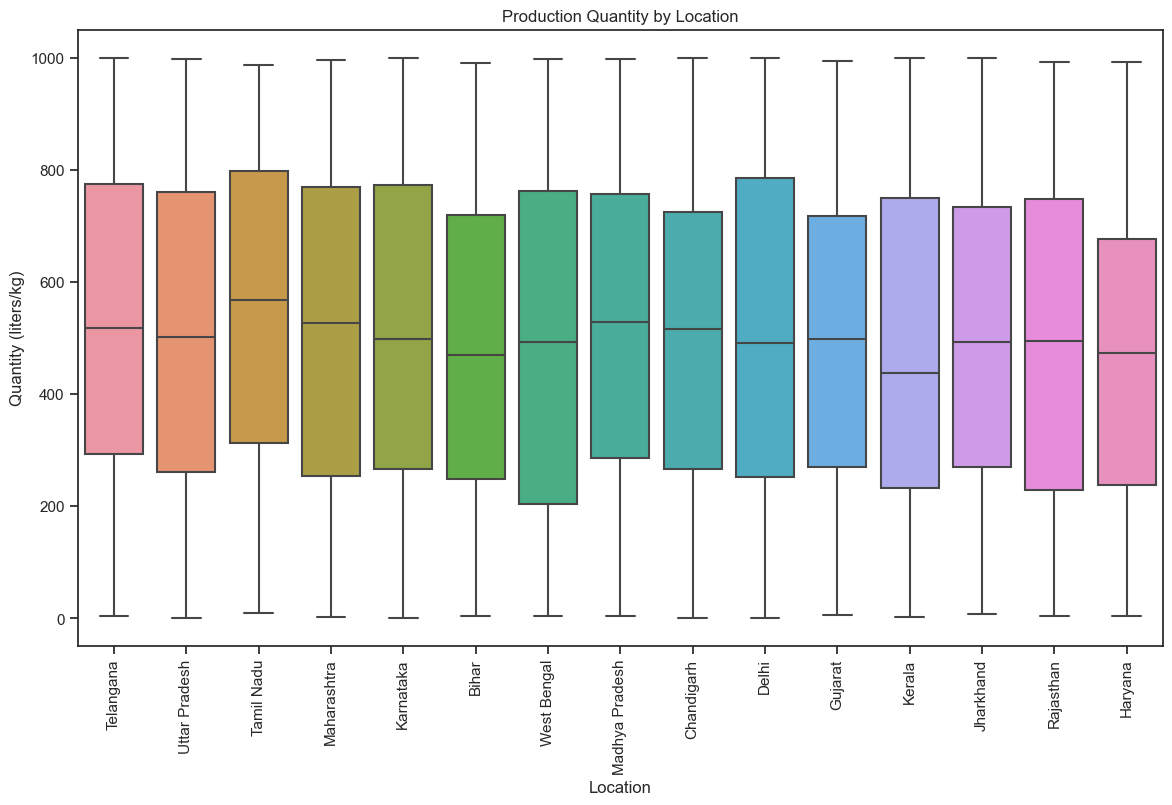

Location
Delhi             264116.78
Chandigarh        260545.14
Uttar Pradesh     138929.46
Madhya Pradesh    135215.17
Gujarat           133873.94
Karnataka         130778.69
Maharashtra       129449.65
Telangana         127796.76
Rajasthan         125243.29
Jharkhand         123144.54
Kerala            119904.75
West Bengal       119844.19
Haryana           119478.31
Bihar             118832.82
Tamil Nadu        118169.25
Name: Quantity (liters/kg), dtype: float64


In [19]:
# Analyze production quantity by geographical location
plt.figure(figsize=(14, 8))
sns.boxplot(x='Location', y='Quantity (liters/kg)', data=df)
plt.xticks(rotation=90)
plt.title('Production Quantity by Location')
plt.xlabel('Location')
plt.ylabel('Quantity (liters/kg)')
plt.show()

# Aggregate production quantity by location
production_by_location = df.groupby('Location')['Quantity (liters/kg)'].sum().sort_values(ascending=False)
print(production_by_location)

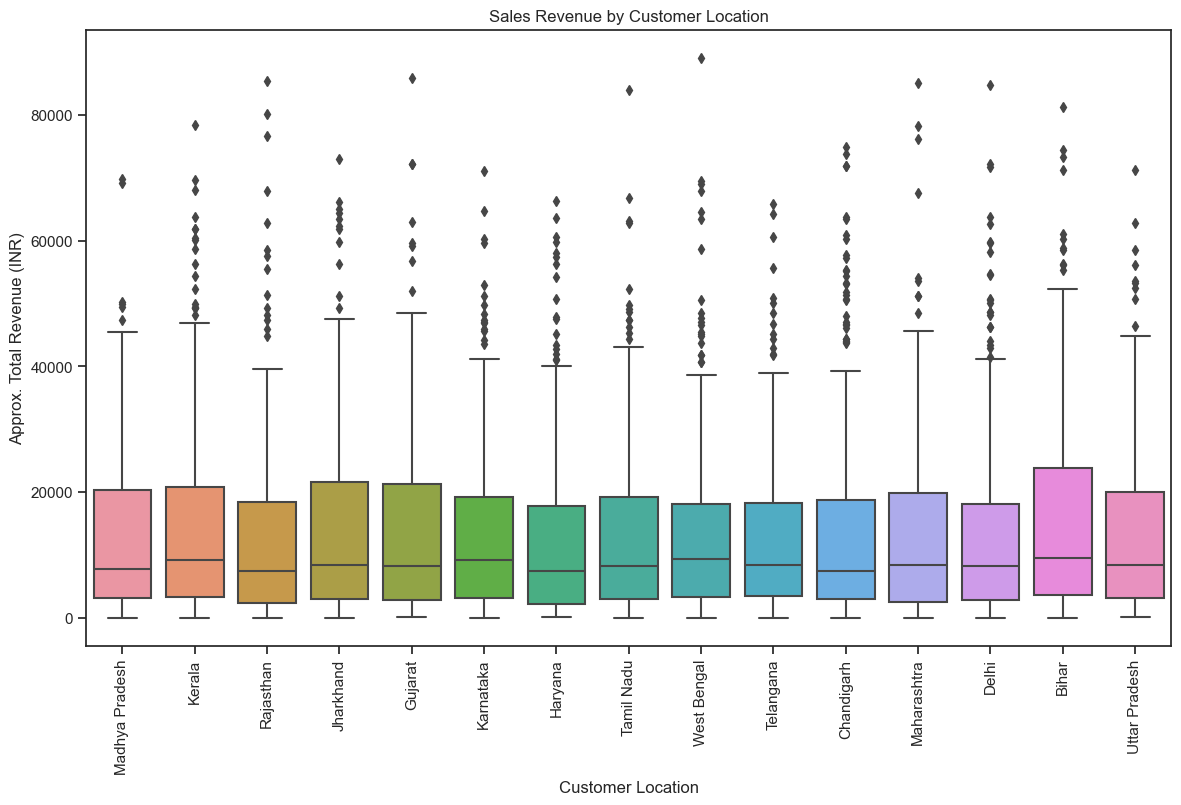

Customer Location
Chandigarh        6334678.26
Delhi             6315810.80
Bihar             4504967.19
Kerala            3907802.01
West Bengal       3669851.99
Karnataka         3669819.65
Maharashtra       3635633.24
Uttar Pradesh     3595655.05
Tamil Nadu        3545342.60
Gujarat           3517231.57
Jharkhand         3440456.65
Madhya Pradesh    3323130.16
Telangana         3251027.41
Rajasthan         3112950.01
Haryana           2910291.27
Name: Approx. Total Revenue(INR), dtype: float64


In [20]:
# Analyze sales revenue by customer location
plt.figure(figsize=(14, 8))
sns.boxplot(x='Customer Location', y='Approx. Total Revenue(INR)', data=df)
plt.xticks(rotation=90)
plt.title('Sales Revenue by Customer Location')
plt.xlabel('Customer Location')
plt.ylabel('Approx. Total Revenue (INR)')
plt.show()

# Aggregate sales revenue by customer location
revenue_by_customer_location = df.groupby('Customer Location')['Approx. Total Revenue(INR)'].sum().sort_values(ascending=False)
print(revenue_by_customer_location)

Notes: Chandigarh and Delhi are the top two locations for both production quantity by location and sales revenue by customer location. However, the states don't always correlate. For example, Bihar is the 3rd most revenue producing customer location, but 14th (second to last) state in terms of Quantity produced. Bihar isn't producing much product, but they are making a lot of money. Need to analyze further. 

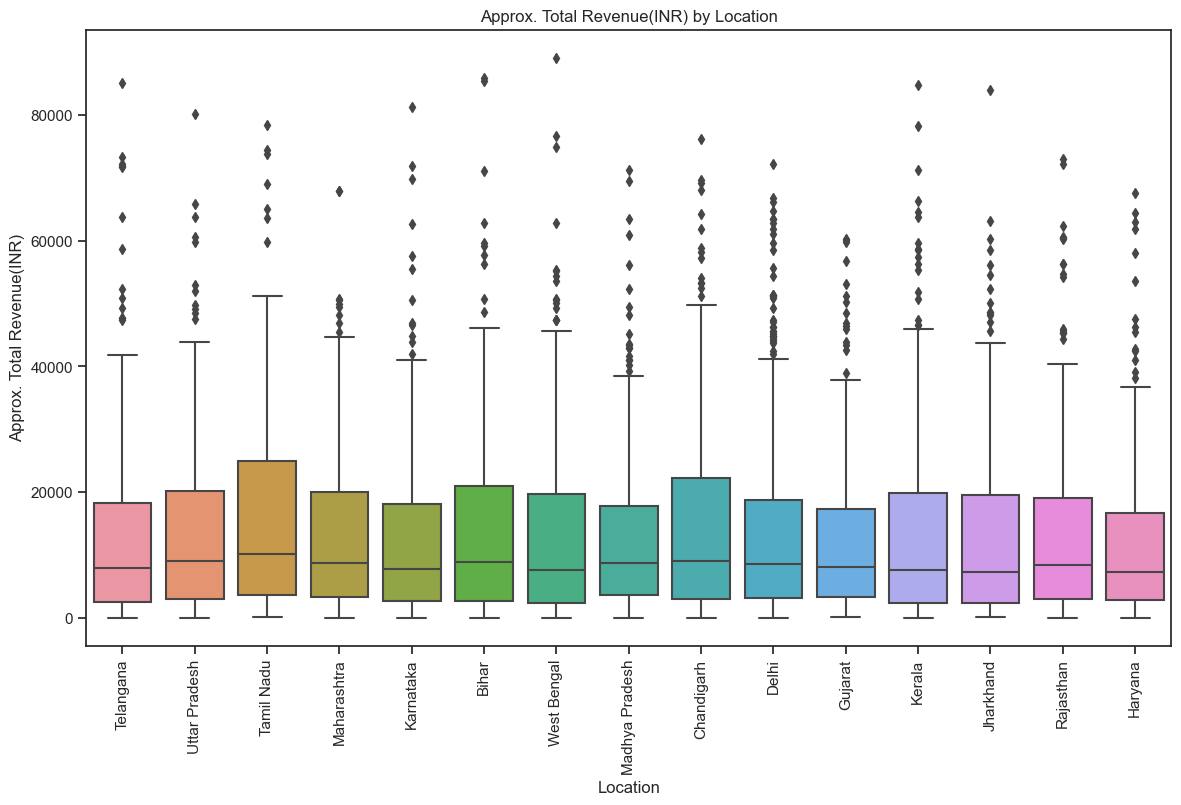

Location
Chandigarh        7538982.35
Delhi             6952125.24
Uttar Pradesh     3705388.56
Maharashtra       3535381.94
Kerala            3485112.52
Tamil Nadu        3455957.32
Madhya Pradesh    3448986.54
Bihar             3446206.42
Rajasthan         3443553.56
Telangana         3367815.11
West Bengal       3350541.68
Jharkhand         3341338.74
Gujarat           3331222.75
Karnataka         3288575.76
Haryana           3043459.37
Name: Approx. Total Revenue(INR), dtype: float64


In [21]:
# Analyze revenue by geographical location
plt.figure(figsize=(14, 8))
sns.boxplot(x='Location', y='Approx. Total Revenue(INR)', data=df)
plt.xticks(rotation=90)
plt.title('Approx. Total Revenue(INR) by Location')
plt.xlabel('Location')
plt.ylabel('Approx. Total Revenue(INR)')
plt.show()

# Aggregate Approx. Total Revenue(INR) by location
revenue_by_location = df.groupby('Location')['Approx. Total Revenue(INR)'].sum().sort_values(ascending=False)
print(revenue_by_location)

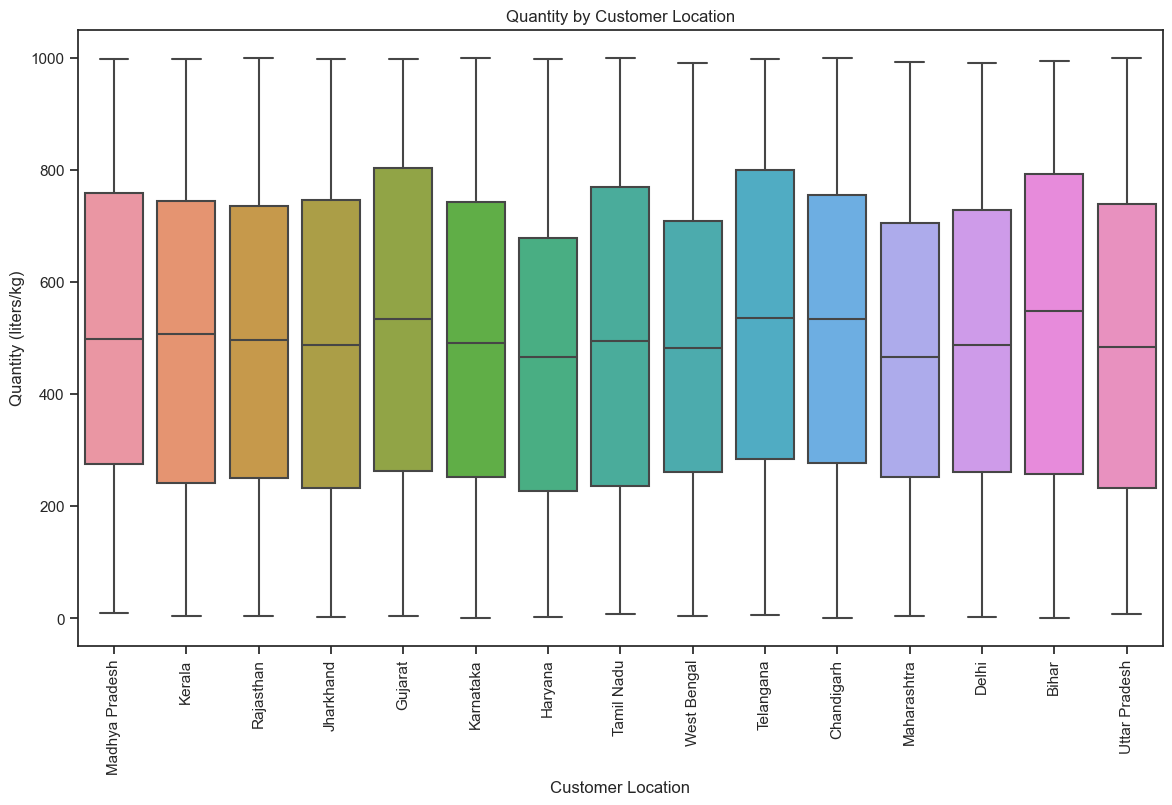

Customer Location
Chandigarh        250960.72
Delhi             245574.34
Bihar             148760.63
Telangana         134135.93
Tamil Nadu        134096.37
Kerala            133070.07
Uttar Pradesh     131944.70
Karnataka         131938.51
West Bengal       129828.25
Gujarat           129063.30
Maharashtra       128834.38
Madhya Pradesh    127636.28
Jharkhand         118946.96
Rajasthan         115211.97
Haryana           105320.33
Name: Quantity (liters/kg), dtype: float64


In [22]:
# Analyze quantity by customer location
plt.figure(figsize=(14, 8))
sns.boxplot(x='Customer Location', y='Quantity (liters/kg)', data=df)
plt.xticks(rotation=90)
plt.title('Quantity by Customer Location')
plt.xlabel('Customer Location')
plt.ylabel('Quantity (liters/kg)')
plt.show()

# Aggregate sales revenue by customer location
quantity_by_customer_location = df.groupby('Customer Location')['Quantity (liters/kg)'].sum().sort_values(ascending=False)
print(quantity_by_customer_location)

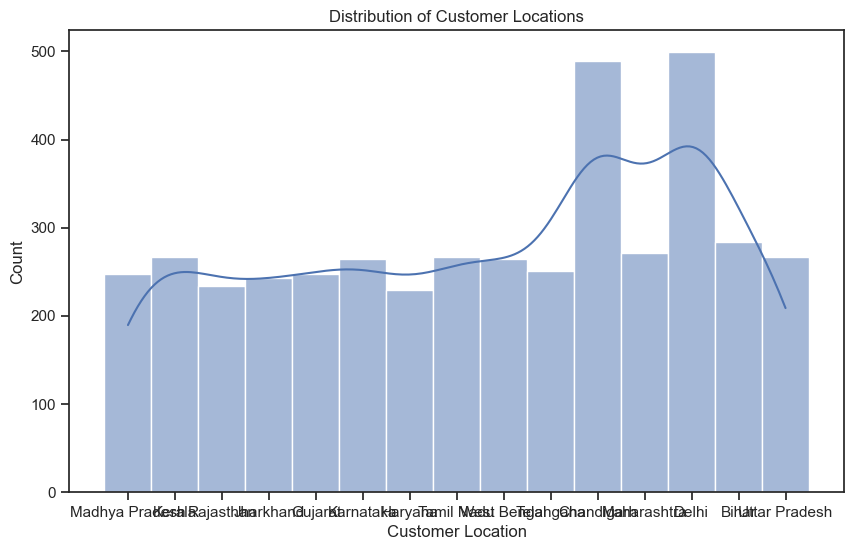

In [23]:
# Customer location count
plt.figure(figsize=(10, 6))
sns.histplot(df['Customer Location'], kde=True)
plt.title('Distribution of Customer Locations')
plt.show()

#### Farm Size

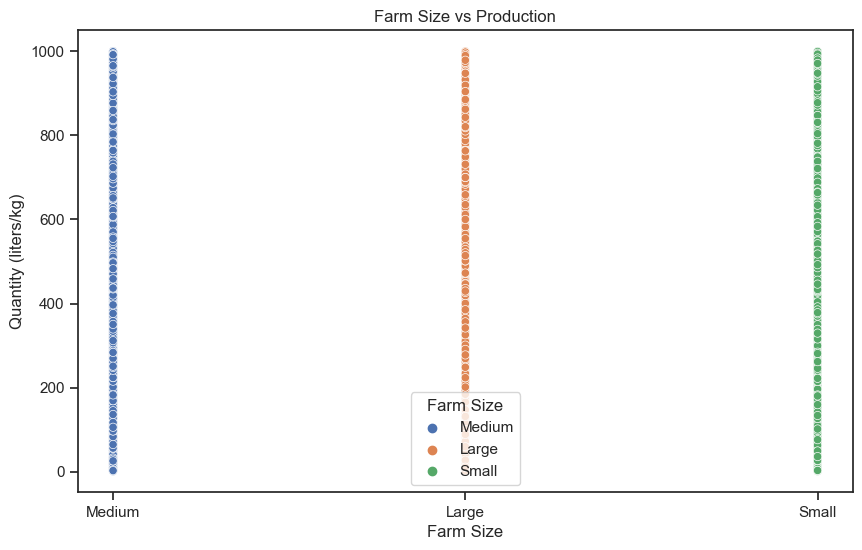

                            Total Land Area (acres)  Number of Cows  \
Total Land Area (acres)                    1.000000       -0.009594   
Number of Cows                            -0.009594        1.000000   
Quantity (liters/kg)                      -0.001347       -0.004254   
Approx. Total Revenue(INR)                -0.015278        0.003461   

                            Quantity (liters/kg)  Approx. Total Revenue(INR)  
Total Land Area (acres)                -0.001347                   -0.015278  
Number of Cows                         -0.004254                    0.003461  
Quantity (liters/kg)                    1.000000                    0.516351  
Approx. Total Revenue(INR)              0.516351                    1.000000  


In [24]:
# Scatter plot for farm size vs production and revenue
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Farm Size', y='Quantity (liters/kg)', data=df, hue='Farm Size')
plt.title('Farm Size vs Production')
plt.show()

# Calculate correlation coefficients
correlation = df[['Total Land Area (acres)', 'Number of Cows', 'Quantity (liters/kg)', 'Approx. Total Revenue(INR)']].corr()
print(correlation)

#### Product-Level Analysis

  Product Name  Quantity Sold (liters/kg)  Approx. Total Revenue(INR)
3         Curd                     120415                  6743880.73
6        Lassi                     112731                  6130168.70
7         Milk                     109852                  6021395.90
0       Butter                     109578                  6276041.59
8       Paneer                     107931                  5962594.91
5    Ice Cream                     104780                  5304634.44
9       Yogurt                     104744                  5595059.89
2       Cheese                     104065                  5547882.20
1   Buttermilk                     100402                  5767704.18
4         Ghee                      98513                  5385285.32


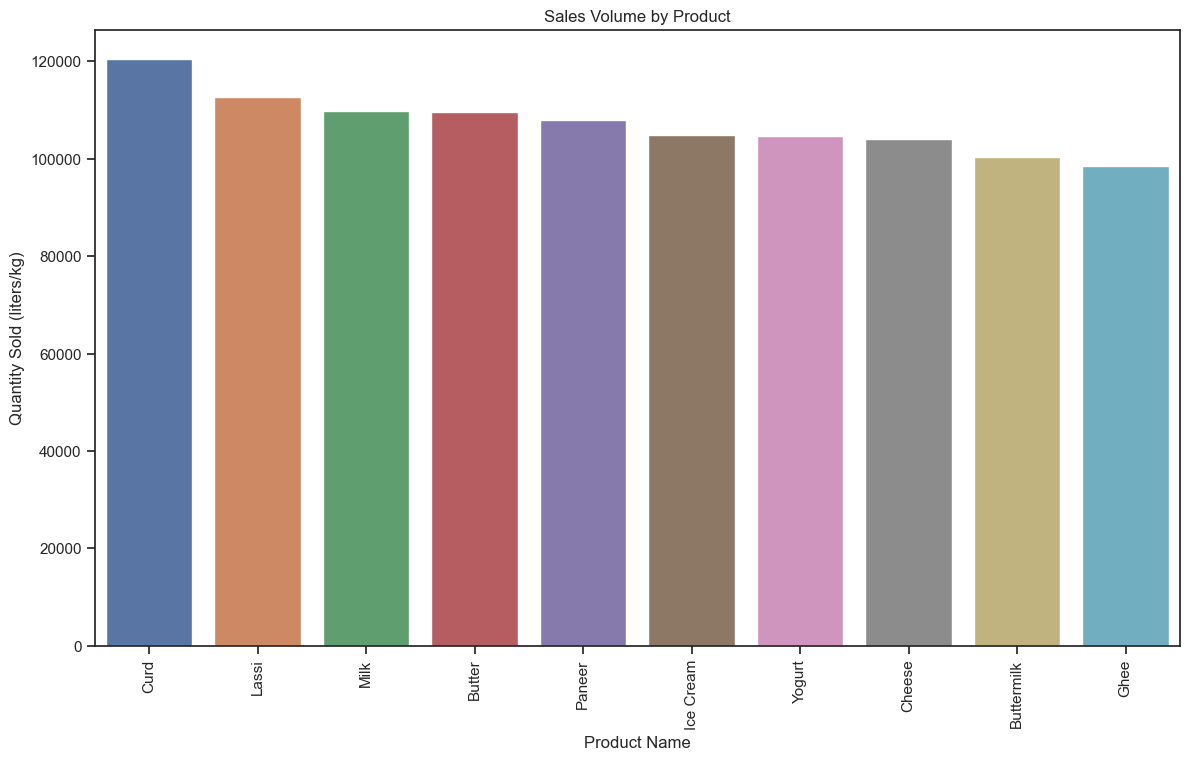

In [25]:
# Group by product and calculate sales volume and revenue
product_sales = df.groupby('Product Name').agg({'Quantity Sold (liters/kg)': 'sum', 'Approx. Total Revenue(INR)': 'sum'}).reset_index()

# Sort by 'Quantity Sold (liters/kg)' in descending order
product_sales = product_sales.sort_values(by='Quantity Sold (liters/kg)', ascending=False)

print(product_sales)

# Visualize product sales
plt.figure(figsize=(14, 8))
sns.barplot(x='Product Name', y='Quantity Sold (liters/kg)', data=product_sales)
plt.title('Sales Volume by Product')
plt.xticks(rotation=90)
plt.show()

  Product Name  Approx. Total Revenue(INR)  Quantity Sold (liters/kg)
3         Curd                  6743880.73                     120415
0       Butter                  6276041.59                     109578
6        Lassi                  6130168.70                     112731
7         Milk                  6021395.90                     109852
8       Paneer                  5962594.91                     107931
1   Buttermilk                  5767704.18                     100402
9       Yogurt                  5595059.89                     104744
2       Cheese                  5547882.20                     104065
4         Ghee                  5385285.32                      98513
5    Ice Cream                  5304634.44                     104780


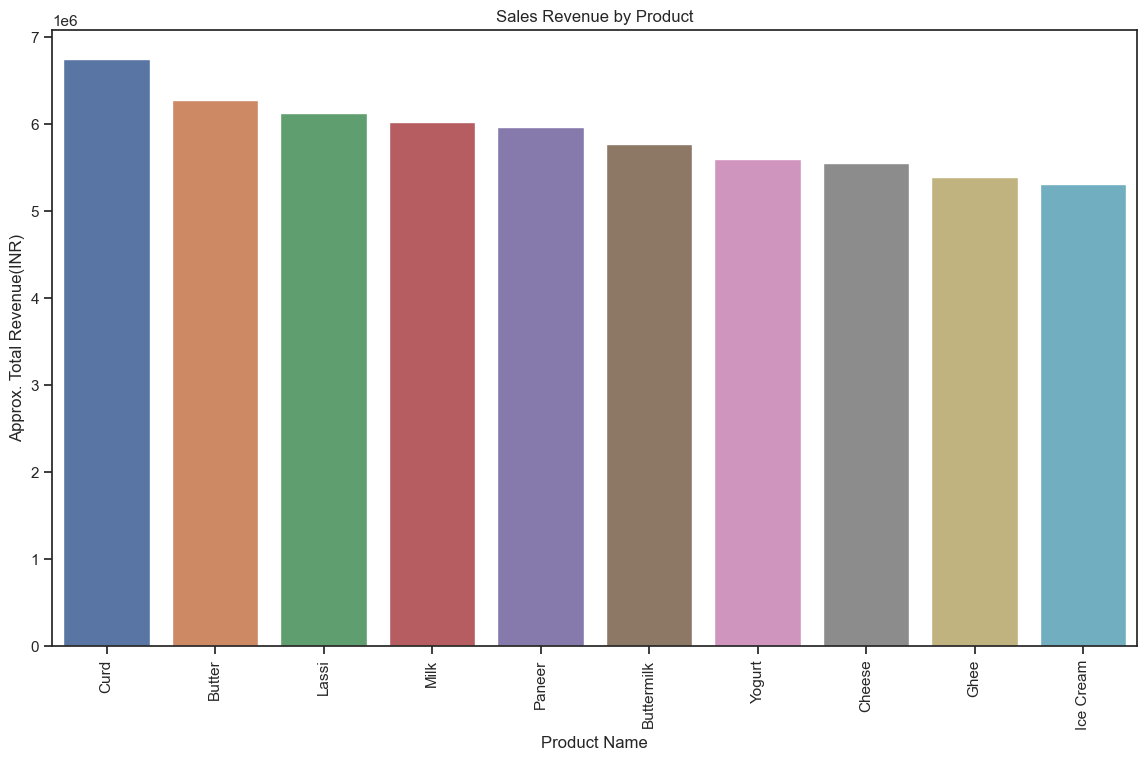

In [26]:
# Group by product and calculate sales volume and revenue
product_revenue = df.groupby('Product Name').agg({'Approx. Total Revenue(INR)': 'sum', 'Quantity Sold (liters/kg)': 'sum'}).reset_index()

# Sort by 'ATR' in descending order
product_revenue = product_revenue.sort_values(by='Approx. Total Revenue(INR)', ascending=False)

print(product_revenue)

# Visualize product sales
plt.figure(figsize=(14, 8))
sns.barplot(x='Product Name', y='Approx. Total Revenue(INR)', data=product_revenue)
plt.title('Sales Revenue by Product')
plt.xticks(rotation=90)
plt.show()

#### Brand-Analysis

                   Brand  Approx. Total Revenue(INR)
0                   Amul                 14608864.46
4           Mother Dairy                 13766786.47
8                    Raj                  9560777.64
9                  Sudha                  8370109.56
2            Dodla Dairy                  2604857.37
5           Palle2patnam                  2528989.12
10                Warana                  1769505.55
6       Parag Milk Foods                  1516697.71
7         Passion Cheese                  1498653.15
3        Dynamix Dairies                  1479884.78
1   Britannia Industries                  1029522.05


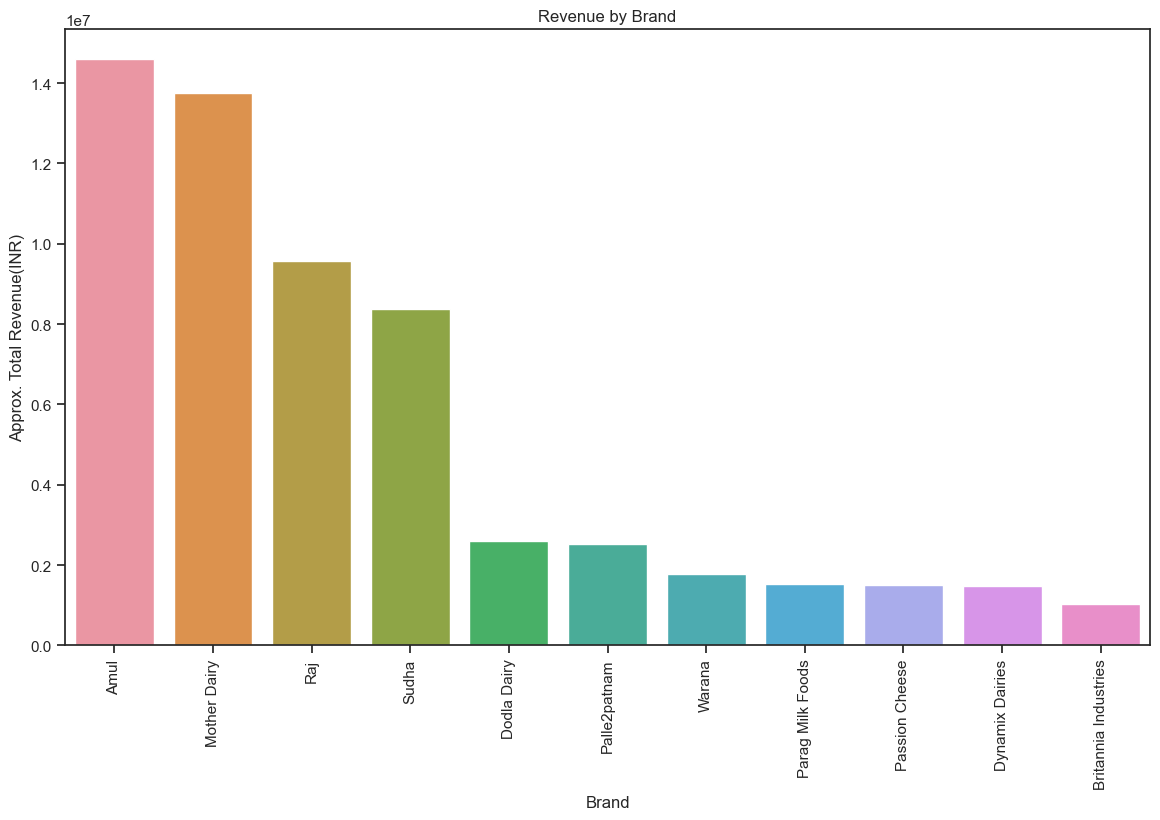

In [27]:
# Group by brand and calculate revenue
brand_revenue = df.groupby('Brand').agg({'Approx. Total Revenue(INR)': 'sum'}).reset_index()

# Sort by 'ATR' in descending order
brand_revenue = brand_revenue.sort_values(by='Approx. Total Revenue(INR)', ascending=False)

print(brand_revenue)

# Visualize brand revenue
plt.figure(figsize=(14, 8))
sns.barplot(x='Brand', y='Approx. Total Revenue(INR)', data=brand_revenue)
plt.title('Revenue by Brand')
plt.xticks(rotation=90)
plt.show()

#### Regional Sales Analysis

   Customer Location  Quantity Sold (liters/kg)
2              Delhi                     118604
1         Chandigarh                     114773
0              Bihar                      77544
13     Uttar Pradesh                      68399
12         Telangana                      67750
6          Karnataka                      67370
7             Kerala                      66948
11        Tamil Nadu                      65892
9        Maharashtra                      65848
14       West Bengal                      63949
3            Gujarat                      63938
5          Jharkhand                      60950
8     Madhya Pradesh                      60082
10         Rajasthan                      57017
4            Haryana                      53947


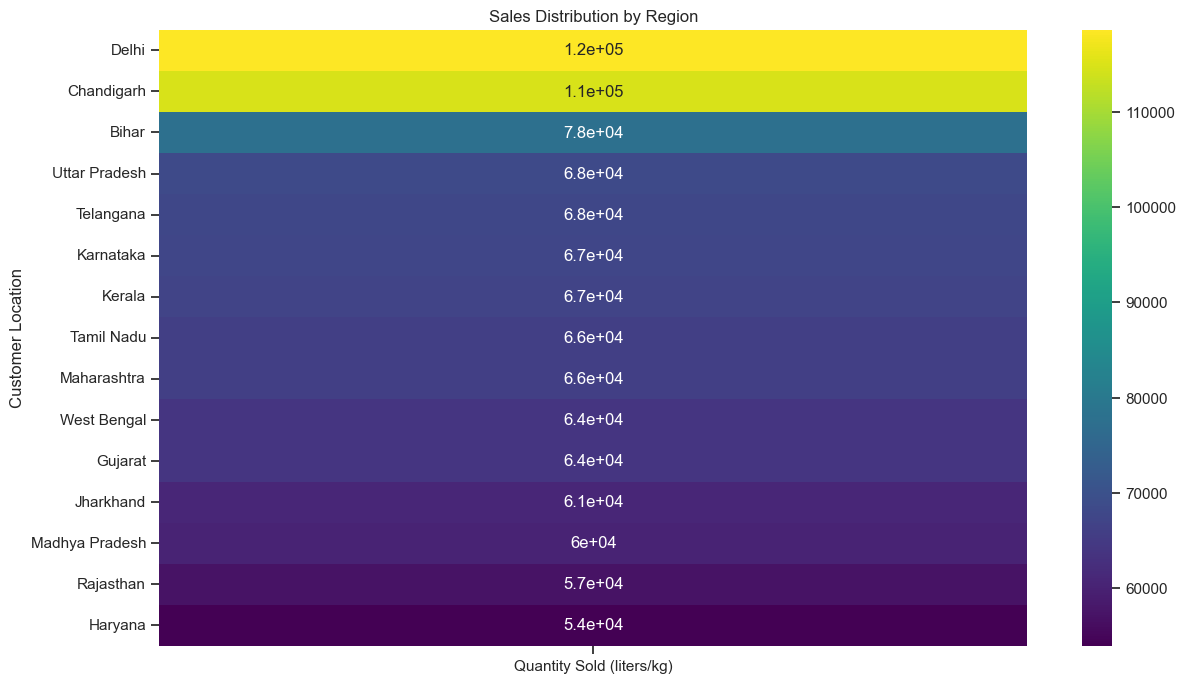

In [28]:
# Group by customer location and calculate sales volume
regional_sales = df.groupby('Customer Location').agg({'Quantity Sold (liters/kg)': 'sum'}).reset_index()

# Sort by 'Quantity Sold (liters/kg)' in descending order
regional_sales = regional_sales.sort_values(by='Quantity Sold (liters/kg)', ascending=False)

print(regional_sales)

# Create a pivot table and sort the index by 'Quantity Sold (liters/kg)'
pivot_table = df.pivot_table(index='Customer Location', values='Quantity Sold (liters/kg)', aggfunc='sum').reindex(regional_sales['Customer Location'])

# Visualize regional sales
plt.figure(figsize=(14, 8))
sns.heatmap(pivot_table, cmap='viridis', annot=True)
plt.title('Sales Distribution by Region')
plt.show()

#### Shelf Life Analysis

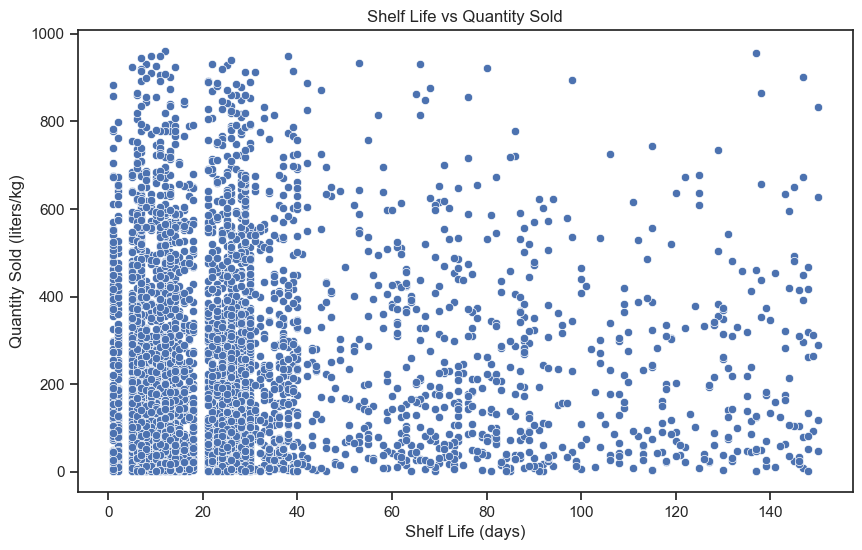

Expiration Rate: 59.28%


In [29]:
# Scatter plot for shelf life vs quantity sold
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Shelf Life (days)', y='Quantity Sold (liters/kg)', data=df)
plt.title('Shelf Life vs Quantity Sold')
plt.show()

# Calculate the rate of products expiring before being sold
expiration_rate = (df[df['Expiration Date'] < df['Date']].shape[0] / df.shape[0]) * 100
print(f'Expiration Rate: {expiration_rate:.2f}%')

#### Customer Segmentation

   Customer Location  Quantity Sold (liters/kg)  Approx. Total Revenue(INR)
1         Chandigarh                     114773                  6334678.26
2              Delhi                     118604                  6315810.80
0              Bihar                      77544                  4504967.19
7             Kerala                      66948                  3907802.01
14       West Bengal                      63949                  3669851.99
6          Karnataka                      67370                  3669819.65
9        Maharashtra                      65848                  3635633.24
13     Uttar Pradesh                      68399                  3595655.05
11        Tamil Nadu                      65892                  3545342.60
3            Gujarat                      63938                  3517231.57
5          Jharkhand                      60950                  3440456.65
8     Madhya Pradesh                      60082                  3323130.16
12         T

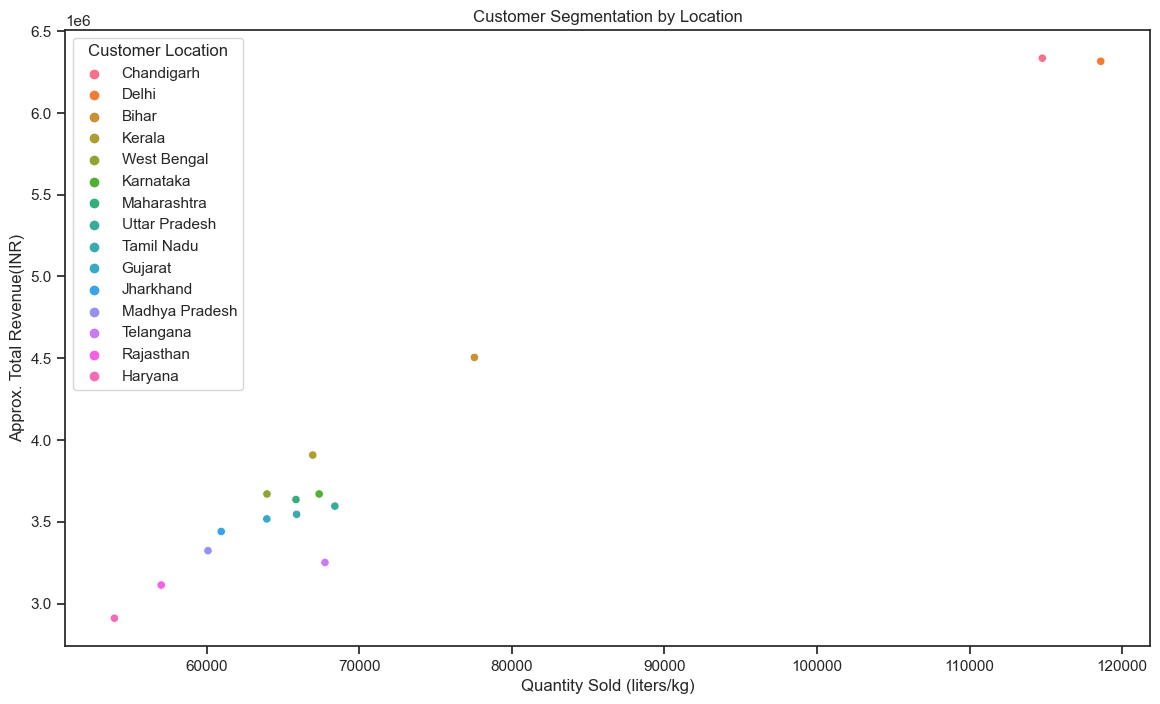

In [30]:
# Group by customer location and calculate purchase frequency and volume
customer_segments = df.groupby('Customer Location').agg({'Quantity Sold (liters/kg)': 'sum', 'Approx. Total Revenue(INR)': 'sum'}).reset_index()

# Sort by 'ATR' in descending order
customer_segments = customer_segments.sort_values(by='Approx. Total Revenue(INR)', ascending=False)

print(customer_segments)


# Visualize customer segments
plt.figure(figsize=(14, 8))
sns.scatterplot(x='Quantity Sold (liters/kg)', y='Approx. Total Revenue(INR)', hue='Customer Location', data=customer_segments)
plt.title('Customer Segmentation by Location')
plt.show()

Notes: What's going on with Telangana?

#### Sales Channel Performance

  Sales Channel  Quantity Sold (liters/kg)  Approx. Total Revenue(INR)
1        Retail                     374807                 20863658.13
2     Wholesale                     369171                 20214596.25
0        Online                     329033                 17656393.48


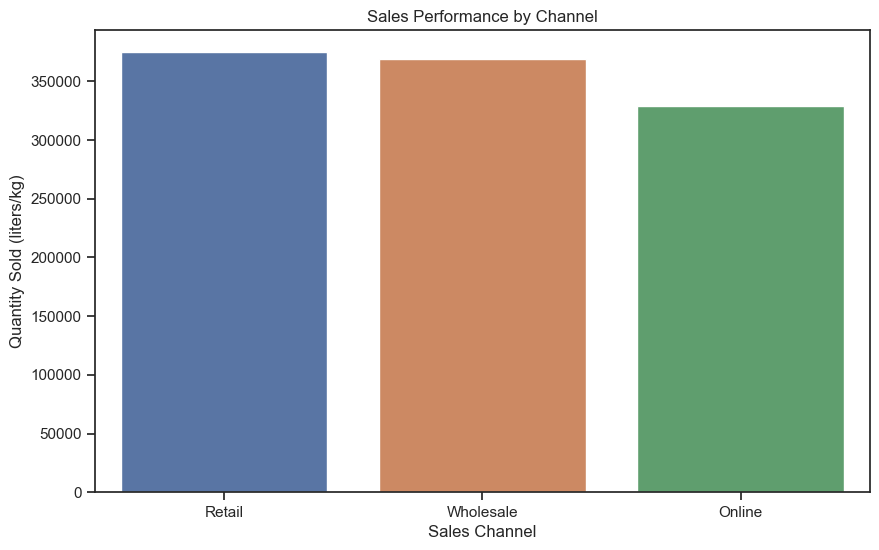

In [31]:
# Group by sales channel and calculate revenue
channel_performance = df.groupby('Sales Channel').agg({'Quantity Sold (liters/kg)': 'sum', 'Approx. Total Revenue(INR)': 'sum'}).reset_index()

# Sort by 'ATR' in descending order
channel_performance = channel_performance.sort_values(by='Approx. Total Revenue(INR)', ascending=False)

print(channel_performance)

# Visualize channel performance
plt.figure(figsize=(10, 6))
sns.barplot(x='Sales Channel', y='Quantity Sold (liters/kg)', data=channel_performance)
plt.title('Sales Performance by Channel')
plt.show()

#### Stock Levels

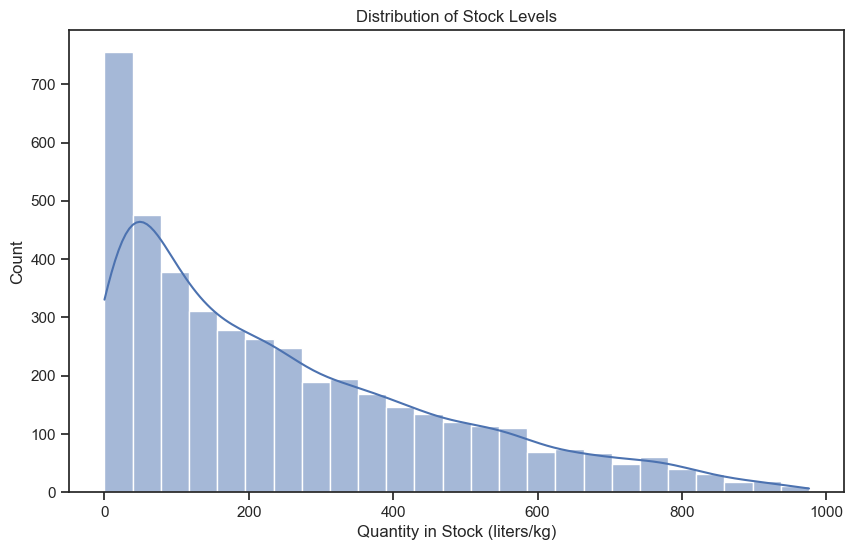

Products at risk of stockouts: 918


In [32]:
# Visualize stock levels
plt.figure(figsize=(10, 6))
sns.histplot(df['Quantity in Stock (liters/kg)'], kde=True)
plt.title('Distribution of Stock Levels')
plt.show()

# Identify products at risk of stockouts
stockout_risk = df[df['Quantity in Stock (liters/kg)'] < df['Minimum Stock Threshold (liters/kg)']]
print(f'Products at risk of stockouts: {stockout_risk.shape[0]}')

#### Reorder Quantities

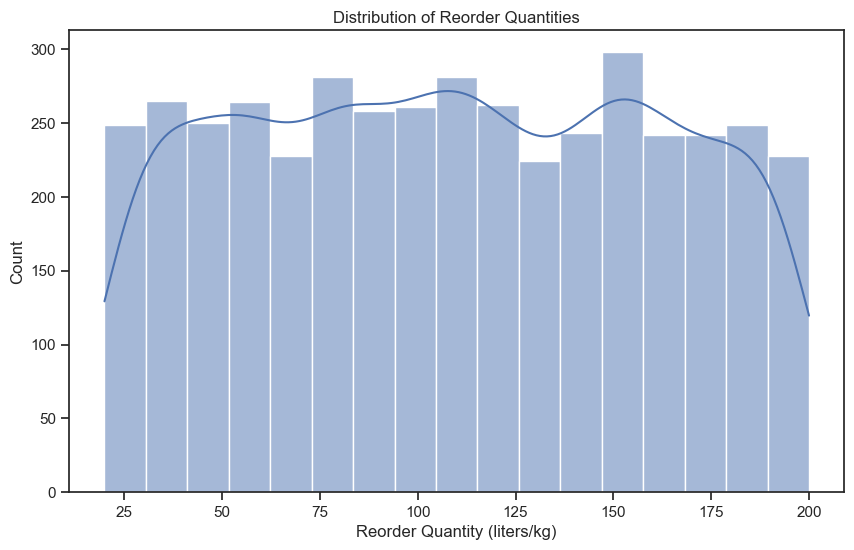

In [33]:
# Visualize reorder quantities
plt.figure(figsize=(10, 6))
sns.histplot(df['Reorder Quantity (liters/kg)'], kde=True)
plt.title('Distribution of Reorder Quantities')
plt.show()

#### Extra

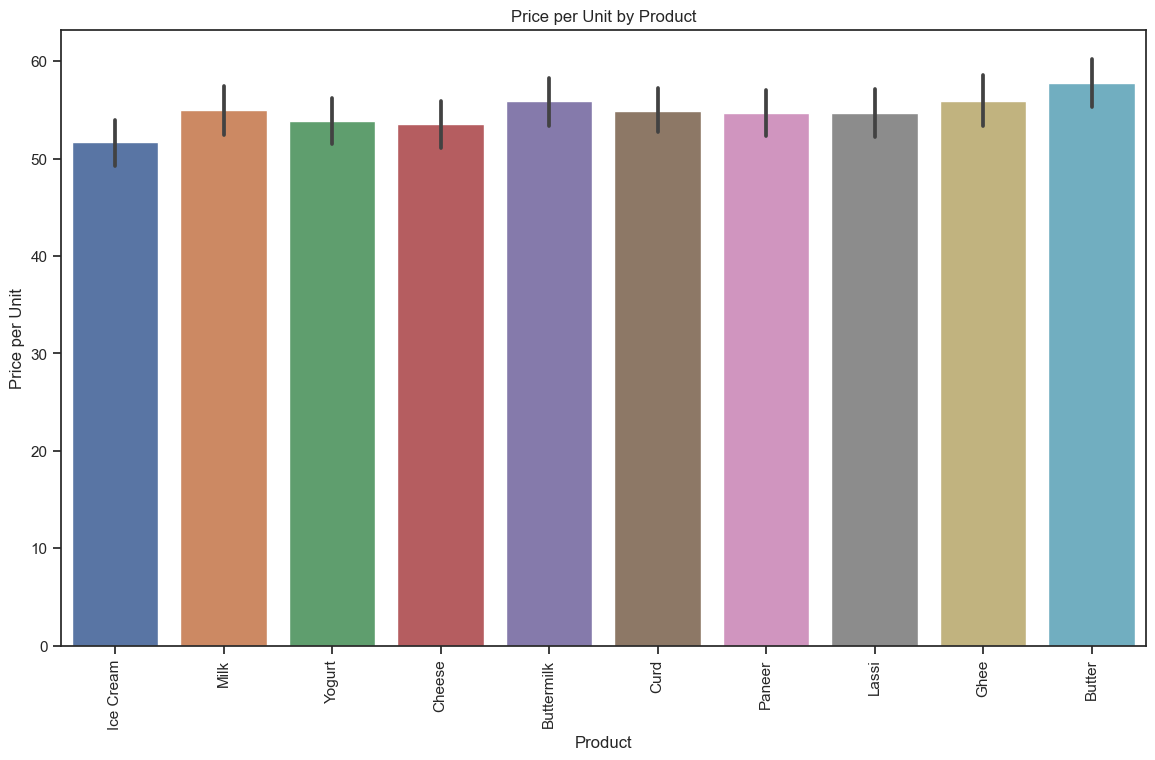

In [34]:
# Create the bar plot
plt.figure(figsize=(14, 8))
sns.barplot(x='Product Name', y='Price per Unit', data=df)
plt.title('Price per Unit by Product')
plt.xlabel('Product')
plt.ylabel('Price per Unit')
plt.xticks(rotation=90)  # Rotate the x-axis labels if there are many products
plt.show()

  Product Name  Price per Unit
0       Butter       57.796984
4         Ghee       55.907040
1   Buttermilk       55.863770
7         Milk       54.933403
3         Curd       54.861106
8       Paneer       54.717551
6        Lassi       54.672036
9       Yogurt       53.876613
2       Cheese       53.505387
5    Ice Cream       51.654444


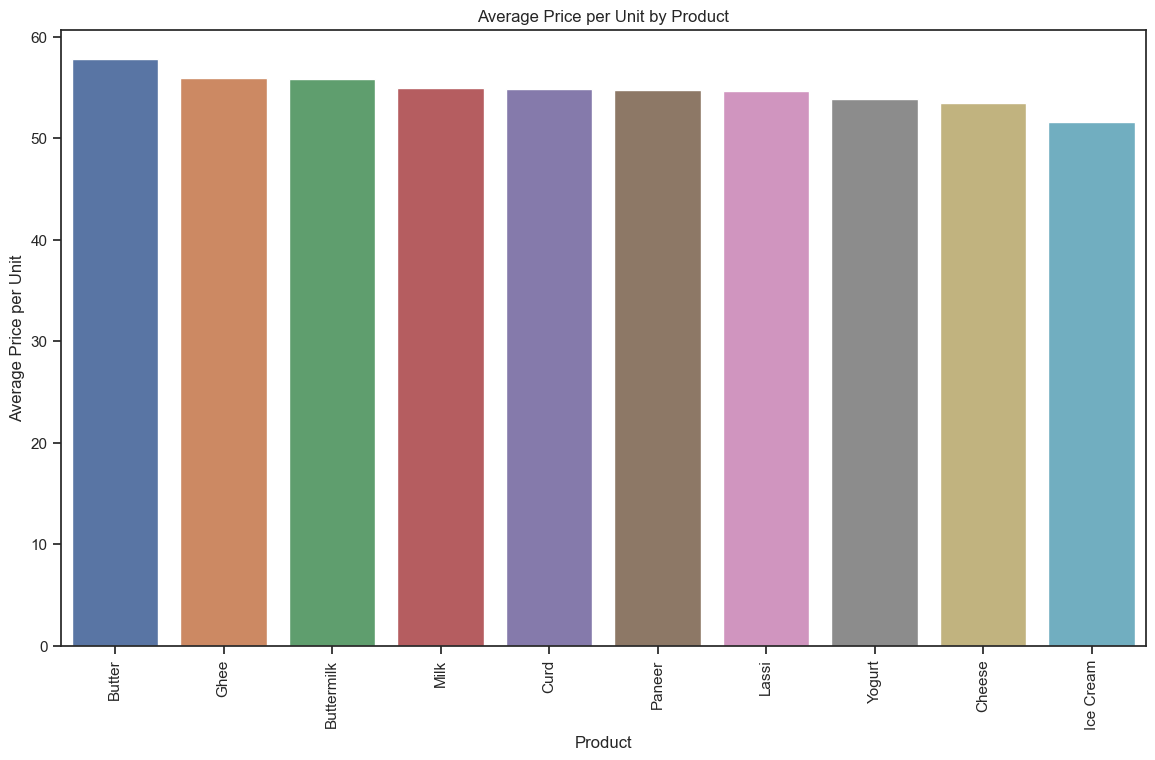

In [37]:
# Calculate the average price per unit for each product
average_price_per_product = df.groupby('Product Name')['Price per Unit'].mean().reset_index()

# Sort by 'Price per Unit' in descending order
average_price_per_product = average_price_per_product.sort_values(by='Price per Unit', ascending=False)

print(average_price_per_product)

# Create the bar plot for the aggregated data
plt.figure(figsize=(14, 8))
sns.barplot(x='Product Name', y='Price per Unit', data=average_price_per_product)
plt.title('Average Price per Unit by Product')
plt.xlabel('Product')
plt.ylabel('Average Price per Unit')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

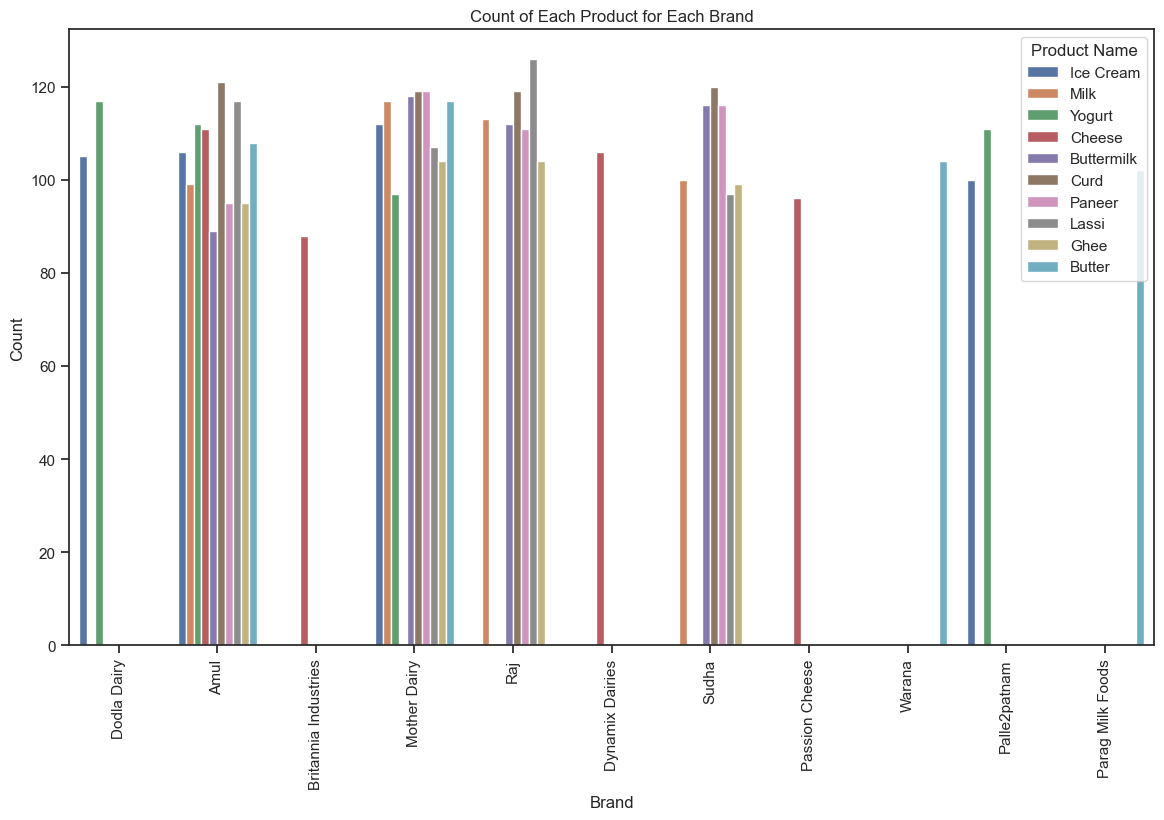

In [39]:
# Create a count plot
plt.figure(figsize=(14, 8))
sns.countplot(data=df, x='Brand', hue='Product Name')

# Set plot title and labels
plt.title('Count of Each Product for Each Brand')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

# Show the plot
plt.show()

/var/folders/b9/y4g8ppyj2bs49xgy2tjbz9c00000gn/T/ipykernel_78193/3456881892.py:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Product Name', y='Count', hue='Brand', data=sorted_counts, ci=None)


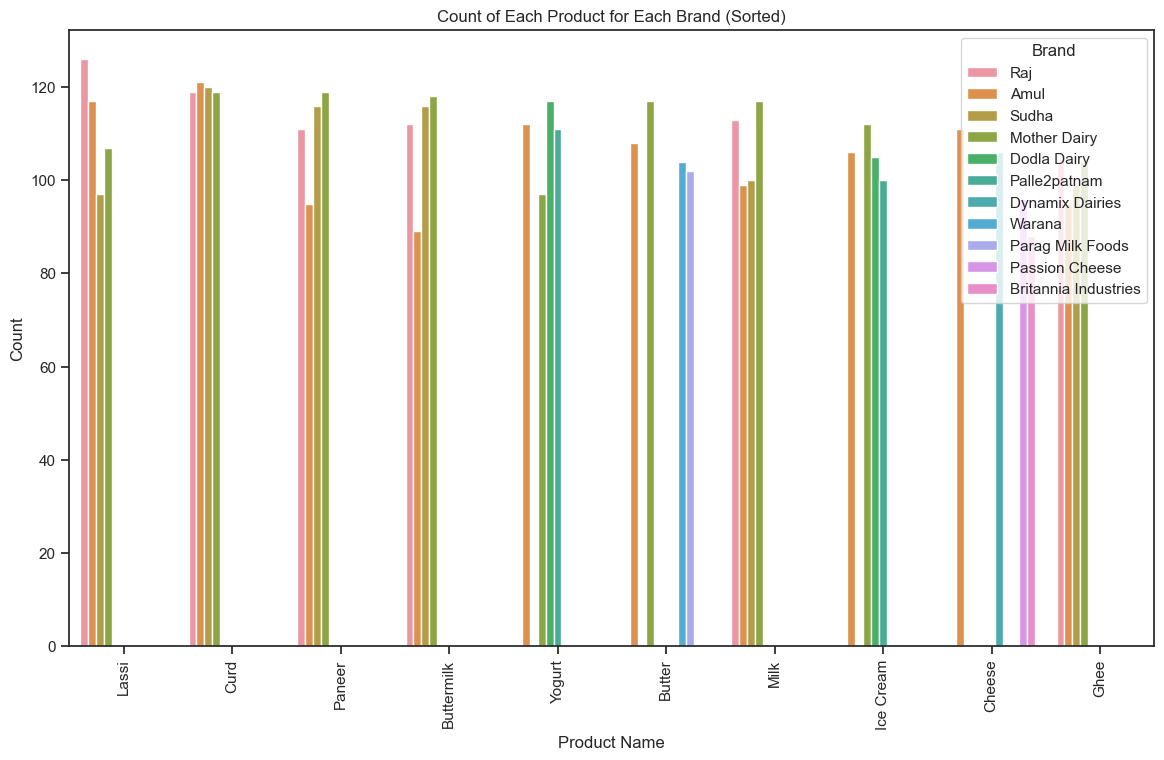

In [41]:
# Calculate the counts of each product for each brand
counts = df.groupby(['Brand', 'Product Name']).size().reset_index(name='Count')

# Sort the counts by Brand and Count in descending order
sorted_counts = counts.sort_values(by=['Count', 'Brand'], ascending=[False, True])

# Ensure the Product Name column is treated as a categorical type with sorted categories
sorted_counts['Product Name'] = pd.Categorical(sorted_counts['Product Name'], 
                                               categories=sorted_counts['Product Name'].unique(), 
                                               ordered=True)

# Create the count plot
plt.figure(figsize=(14, 8))
sns.barplot(x='Product Name', y='Count', hue='Brand', data=sorted_counts, ci=None)

# Set plot title and labels
plt.title('Count of Each Product for Each Brand (Sorted)')
plt.xlabel('Product Name')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

# Show the plot
plt.show()

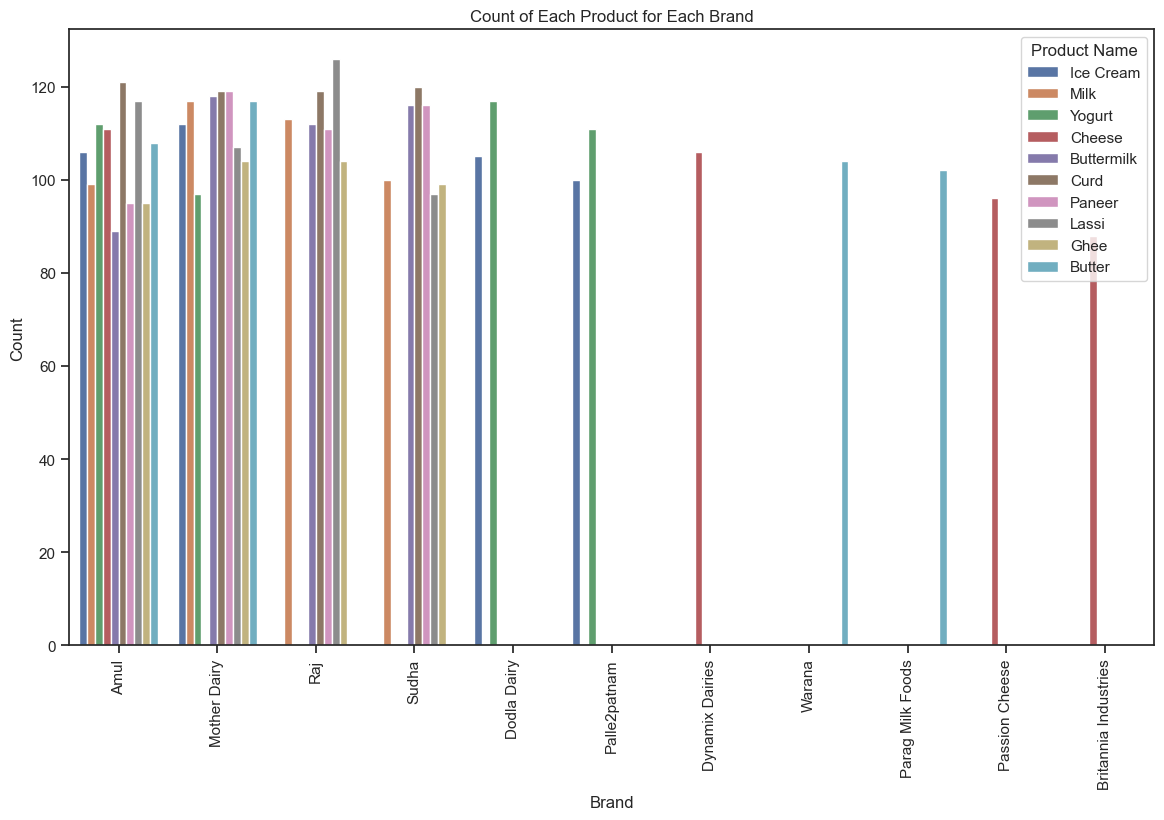

In [42]:
# Calculate the total counts of products for each brand
brand_counts = df['Brand'].value_counts().sort_values(ascending=False)

# Ensure the Brand column is treated as a categorical type with sorted categories
df['Brand'] = pd.Categorical(df['Brand'], categories=brand_counts.index, ordered=True)

# Create the count plot
plt.figure(figsize=(14, 8))
sns.countplot(data=df, x='Brand', hue='Product Name')

# Set plot title and labels
plt.title('Count of Each Product for Each Brand')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

# Show the plot
plt.show()

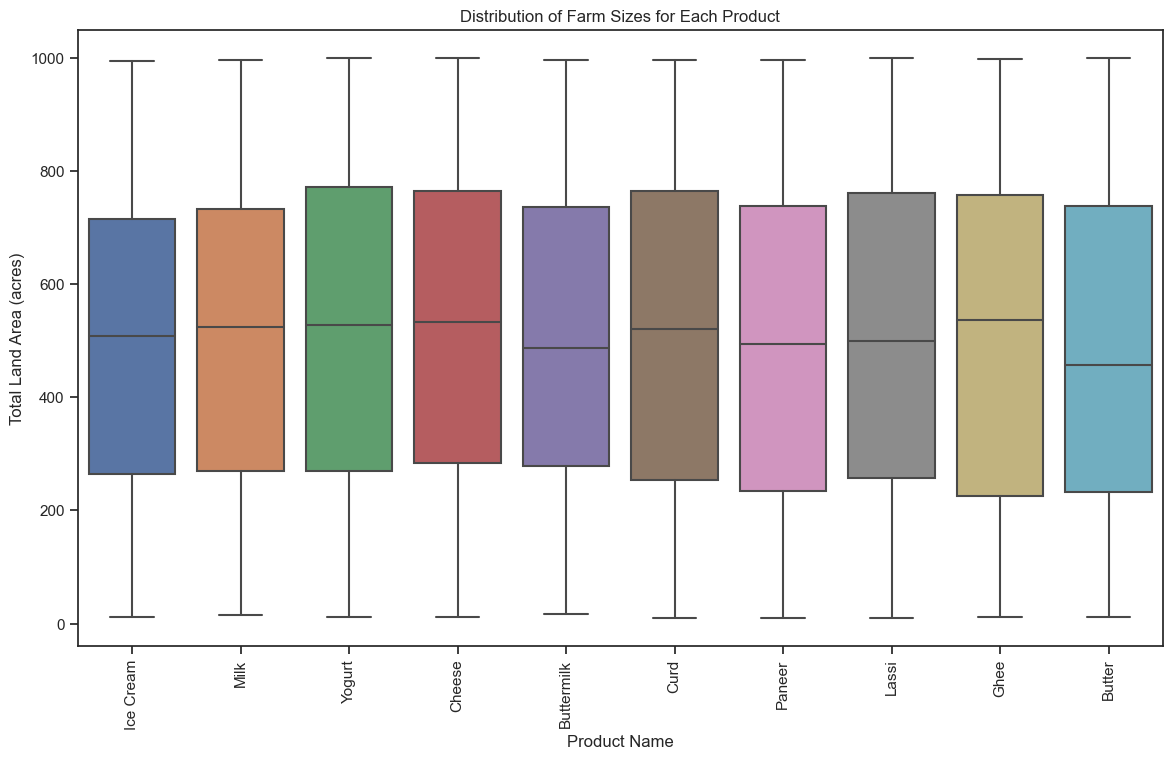

In [44]:
# Create a box plot to show the distribution of farm sizes for each product
plt.figure(figsize=(14, 8))
sns.boxplot(x='Product Name', y='Total Land Area (acres)', data=df)
plt.title('Distribution of Farm Sizes for Each Product')
plt.xlabel('Product Name')
plt.ylabel('Total Land Area (acres)')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

In [48]:
# Group by 'Brand' and calculate statistics for 'Total Land Area (acres)'
brand_farm_size = df.groupby('Brand')['Total Land Area (acres)'].agg(['mean', 'median', 'sum', 'count']).reset_index()

# Print the farm size statistics for each brand
print(brand_farm_size)

                   Brand        mean   median        sum  count
0                   Amul  501.782963  509.170  528377.46   1053
1           Mother Dairy  492.196188  489.625  497118.15   1010
2                    Raj  505.217387  512.090  346073.91    685
3                  Sudha  506.807207  520.320  328411.07    648
4            Dodla Dairy  504.390315  497.010  111974.65    222
5           Palle2patnam  503.496209  521.480  106237.70    211
6        Dynamix Dairies  522.234623  494.735   55356.87    106
7                 Warana  465.164808  433.010   48377.14    104
8       Parag Milk Foods  526.377157  547.800   53690.47    102
9         Passion Cheese  528.384688  539.805   50724.93     96
10  Britannia Industries  582.067500  620.610   51221.94     88


In [50]:
# Group by 'Brand' and 'Farm Size', then count occurrences
farm_size_counts = df.groupby(['Brand', 'Farm Size']).size().unstack(fill_value=0)

# Print the farm size counts for each brand
print(farm_size_counts)

Farm Size             Large  Medium  Small
Brand                                     
Amul                    354     334    365
Mother Dairy            342     354    314
Raj                     222     227    236
Sudha                   236     206    206
Dodla Dairy              72      75     75
Palle2patnam             72      77     62
Dynamix Dairies          23      38     45
Warana                   36      36     32
Parag Milk Foods         44      36     22
Passion Cheese           36      27     33
Britannia Industries     25      29     34


Notes: Each brand has many different farms of different sizes

In [51]:
# Group by 'Farm Size' and 'Product Name' and count occurrences
product_counts = df.groupby(['Farm Size', 'Product Name']).size().reset_index(name='Count')

# Find the most common product for each farm size
most_common_products = product_counts.loc[product_counts.groupby('Farm Size')['Count'].idxmax()]

# Print the most common products for each farm size
print(most_common_products)

   Farm Size Product Name  Count
9      Large       Yogurt    167
13    Medium         Curd    168
23     Small         Curd    160


In [52]:
# Group by 'Farm Size' and 'Product Name' and count occurrences
product_counts = df.groupby(['Farm Size', 'Product Name']).size().reset_index(name='Count')

# Pivot the data to get Farm Size as rows and Product Name as columns
product_counts_pivot = product_counts.pivot(index='Farm Size', columns='Product Name', values='Count').fillna(0)

# Print the pivot table
print(product_counts_pivot)

Product Name  Butter  Buttermilk  Cheese  Curd  Ghee  Ice Cream  Lassi  Milk  \
Farm Size                                                                      
Large            156         153     119   151   125        134    160   154   
Medium           137         150     129   168   140        150    140   132   
Small            138         132     153   160   137        139    147   143   

Product Name  Paneer  Yogurt  
Farm Size                     
Large            143     167  
Medium           158     135  
Small            140     135  


In [53]:
# Group by 'Brand' and 'Product Name' and count occurrences
product_counts = df.groupby(['Brand', 'Product Name']).size().reset_index(name='Count')

# Pivot the data to get Farm Size as rows and Product Name as columns
product_counts_pivot = product_counts.pivot(index='Brand', columns='Product Name', values='Count').fillna(0)

# Print the pivot table
print(product_counts_pivot)

Product Name          Butter  Buttermilk  Cheese  Curd  Ghee  Ice Cream  \
Brand                                                                     
Amul                     108          89     111   121    95        106   
Mother Dairy             117         118       0   119   104        112   
Raj                        0         112       0   119   104          0   
Sudha                      0         116       0   120    99          0   
Dodla Dairy                0           0       0     0     0        105   
Palle2patnam               0           0       0     0     0        100   
Dynamix Dairies            0           0     106     0     0          0   
Warana                   104           0       0     0     0          0   
Parag Milk Foods         102           0       0     0     0          0   
Passion Cheese             0           0      96     0     0          0   
Britannia Industries       0           0      88     0     0          0   

Product Name          La

In [54]:
# Group by 'Brand' and get the unique locations for each brand
locations_by_brand = df.groupby('Brand')['Location'].unique().reset_index()

# Print the locations for each brand
for index, row in locations_by_brand.iterrows():
    print(f"Brand: {row['Brand']}")
    print(f"Locations: {', '.join(row['Location'])}")
    print()

Brand: Amul
Locations: Uttar Pradesh, Kerala, Madhya Pradesh, Tamil Nadu, Gujarat, Chandigarh, Delhi, Jharkhand, Haryana, Telangana, Maharashtra, Rajasthan, Bihar, Karnataka, West Bengal

Brand: Mother Dairy
Locations: Maharashtra, Bihar, Telangana, Kerala, Madhya Pradesh, Chandigarh, Jharkhand, Rajasthan, Delhi, Uttar Pradesh, West Bengal, Tamil Nadu, Karnataka, Haryana, Gujarat

Brand: Raj
Locations: Telangana, West Bengal, Jharkhand, Bihar, Delhi, Madhya Pradesh, Chandigarh, Maharashtra, Uttar Pradesh, Karnataka, Gujarat, Tamil Nadu, Haryana, Kerala, Rajasthan

Brand: Sudha
Locations: Chandigarh, Maharashtra, Rajasthan, Kerala, Karnataka, Tamil Nadu, Bihar, Delhi, Jharkhand, Uttar Pradesh, West Bengal, Gujarat, Telangana, Haryana, Madhya Pradesh

Brand: Dodla Dairy
Locations: Telangana, Tamil Nadu, Madhya Pradesh, Gujarat, Karnataka, Rajasthan, Delhi, Bihar, Haryana, Chandigarh, Uttar Pradesh, Kerala, Maharashtra, Jharkhand, West Bengal

Brand: Palle2patnam
Locations: Telangana, Cha

In [55]:
# Group by 'Customer Location' and 'Brand', and count occurrences
brand_counts = df.groupby(['Customer Location', 'Brand']).size().reset_index(name='Count')

# Pivot the data to get Customer Location as rows and Brand as columns
brand_counts_pivot = brand_counts.pivot(index='Customer Location', columns='Brand', values='Count').fillna(0)

# Print the pivot table
print(brand_counts_pivot)

Brand              Amul  Mother Dairy  Raj  Sudha  Dodla Dairy  Palle2patnam  \
Customer Location                                                              
Bihar                73            64   44     33           17            19   
Chandigarh          120           116   69     74           32            20   
Delhi               124           113   89     75           23            25   
Gujarat              65            59   46     35            7            10   
Haryana              62            59   23     35           11             9   
Jharkhand            61            49   46     34           14            13   
Karnataka            69            71   30     38           17            12   
Kerala               68            51   54     36           11            17   
Madhya Pradesh       58            67   38     32           14            18   
Maharashtra          64            60   46     41           14            17   
Rajasthan            54            58   

In [57]:
# Group by 'Customer Location' and 'Brand', and count occurrences
brand_counts = df.groupby(['Customer Location', 'Brand']).size().reset_index(name='Count')

# Identify the brand with the highest count for each location
most_popular_brands = brand_counts.loc[brand_counts.groupby('Customer Location')['Count'].idxmax()]

# Print the most popular brands for each customer location
print(most_popular_brands)

    Customer Location         Brand  Count
0               Bihar          Amul     73
11         Chandigarh          Amul    120
22              Delhi          Amul    124
33            Gujarat          Amul     65
44            Haryana          Amul     62
55          Jharkhand          Amul     61
67          Karnataka  Mother Dairy     71
77             Kerala          Amul     68
89     Madhya Pradesh  Mother Dairy     67
99        Maharashtra          Amul     64
111         Rajasthan  Mother Dairy     58
121        Tamil Nadu          Amul     64
133         Telangana  Mother Dairy     55
143     Uttar Pradesh          Amul     64
155       West Bengal  Mother Dairy     71
